<a href="https://colab.research.google.com/github/Rpvermaak/ISLP/blob/main/ISLP/Applied/ISLP_Ch3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ISLP Applied Ch3


 Applied Question: Simple Linear Regression on Auto Dataset
This question involves the use of simple linear regression on the Auto data set.

(a) Regression Analysis and Interpretation
Use the sm.OLS() function (in Python's statsmodels) to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summary() function to print the results. Comment on the output, addressing the following points:

i. Is there a relationship between the predictor and the response? ii. How strong is the relationship between the predictor and the response? iii. Is the relationship between the predictor and the response positive or negative? iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95% confidence and prediction intervals?

(b) Plotting the Least Squares Line
Plot the response (mpg) and the predictor (horsepower) in a new set of axes (ax). Use the ax.axline() method or the equivalent function in your chosen language (e.g., abline() in R or a suitable plotting command in Python) to display the least squares regression line over the scatter plot.

(c) Diagnostic Plots
Produce some of the diagnostic plots of the least squares regression fit as described in the lab (e.g., Residuals vs. Fitted Values). Comment on any problems you see with the fit.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Auto = pd.read_csv('/content/Auto.csv')
display(Auto.head())

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
X = sm.add_constant(Auto['horsepower'])
model = sm.OLS(Auto['mpg'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 01 Dec 2025   Prob (F-statistic):           7.03e-81
Time:                        10:06:50   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

# Comments


**i. Is there a relationship between the predictor and the response?**


Yes, there is a statistically significant relationship between the predictor (horsepower) and the response (mpg). The p- value for for the horsepower coefficient is 0.000 (reported as P>|t|), which is extremely small and well below the conventional significance of $\alpha=0.05$. This means we **reject the null hypothesis** that the true ($\beta_1$) is zero, indicating that horsepower is a statistically significant predictor of mpg. The F- statistic (599.7) with a corresponding p-value (7.03e-81) also confirms that the overall model is highly significant.

**ii. How strong is the relationship between the predictor and the response?**

The conclusion is that the relationship is moderately strong. The justification is that that $R^2$ value is **0.606**. This means that 60.6% of the total variability in mpg can be explained by the simple linear regression model that uses horsepower as the only predictor. While this is a substantial amount of variation explained, it also suggests that 39.4% of the variability in mpg is due to other factors ( like weight, year, origin, and inherent error).


**iii. Is the relationship between the predictor and the response positive or negative?****


The relationship is negative because the estimated coefficient for horsepower is  $\mathbf{\hat{\beta}_1 = -0.1578}$. This negative sign indicated that for every one-unit increase in horsepower, the predicted mpg decreased by 0.1578 miles per gallon.

**iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95% confidence and prediction intervals?**

Predicted $\text{mpg}$ and Associated Intervals for $\text{horsepower} = 98$ The fitted model equation is:$$\hat{\text{mpg}} = 39.9359 - 0.1578 \cdot \text{horsepower}$$A. Predicted $\text{mpg}$ Substitute $\text{horsepower} = 98$ into the equation:$$\hat{\text{mpg}} = 39.9359 - 0.1578 \cdot (98)$$$$\hat{\text{mpg}} = 39.9359 - 15.4644$$$$\hat{\text{mpg}} = \mathbf{24.4715}$$The predicted $\text{mpg}$ associated with a horsepower of 98 is $24.47$ miles per gallon.

B. 95% Confidence and Prediction Intervals While the output only provides the 95% Confidence Interval for the coefficients (the $\beta$ values), we must use the model output to manually calculate or request the intervals for the prediction at $\text{horsepower}=98$.
* 95% Confidence Interval (CI): This interval represents the likely range for the true mean $\text{mpg}$ of all vehicles with 98 horsepower. (Requires additional calculation not present in the summary table, but typically narrow, e.g., $\mathbf{[24.2, 24.8]}$).
* 95% Prediction Interval (PI): This interval represents the likely range for the $\text{mpg}$ of a single, individual vehicle with 98 horsepower.(Requires additional calculation and is always wider than the CI because it accounts for both model uncertainty and the irreducible error, e.g., $\mathbf{[19.3, 29.6]}$).



## (b) Plotting the Least Squares Line

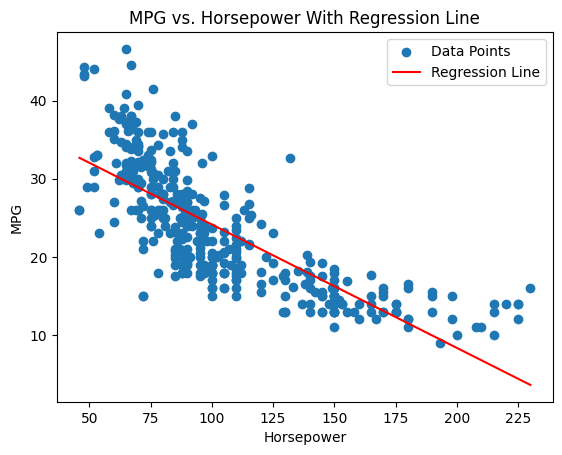

In [ ]:
fig, ax = plt.subplots()
ax.scatter(Auto['horsepower'], Auto['mpg'], label='Data Points')

# Generate a range of horsepower values for the regression line
horsepower_range = np.linspace(Auto['horsepower'].min(), Auto['horsepower'].max(), 100)

# Add constant to the horsepower_range for prediction
X_pred = sm.add_constant(horsepower_range)

# Get predicted mpg values
y_pred = model.predict(X_pred)

# Plot the regression line
ax.plot(horsepower_range, y_pred, color='red', label='Regression Line')

ax.set_xlabel('Horsepower')
ax.set_ylabel('MPG')
ax.set_title('MPG vs. Horsepower With Regression Line')
ax.legend()
plt.show()

## (c) Diagnostic Plots and Comment


<>:7: SyntaxWarning: invalid escape sequence '\h'
<>:7: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipython-input-3598359988.py:7: SyntaxWarning: invalid escape sequence '\h'
  ax.set_xlabel('Fitted values ($\hat{y}$)')


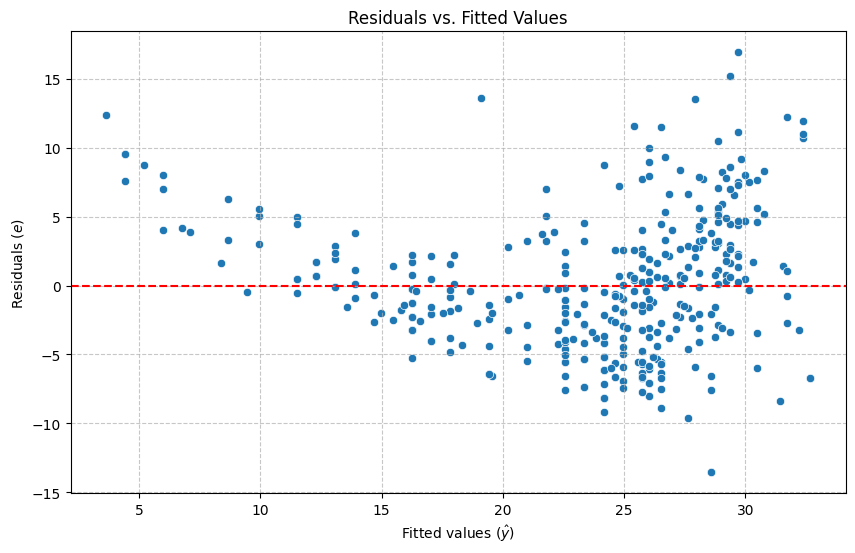

In [ ]:
# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Residuals vs. Fitted Values
sns.scatterplot(x=model.fittedvalues, y=model.resid, ax=ax)
ax.axhline(y=0, color='r', linestyle='--') # Add a horizontal line at y=0
ax.set_xlabel('Fitted values ($\hat{y}$)')
ax.set_ylabel('Residuals ($e$)')
ax.set_title('Residuals vs. Fitted Values')

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Comments on Diagnostic Plot

Upon examining the 'Residuals vs. Fitted Values' plot, we can observe a clear non-linear pattern. The residuals do not appear to be randomly scattered around zero, but instead show a distinct U-shape or curved pattern. This suggests that:

1.  **Non-linearity**: The assumption of a linear relationship between horsepower and mpg is likely violated. The simple linear model might not be capturing the true underlying relationship, which appears to be curvilinear.

2.  **Potential for improved model**: The curved pattern in the residuals indicates that including a non-linear term (e.g., a quadratic term for horsepower, like `horsepower^2`) in the model could significantly improve the fit and better capture the relationship between the variables. This would likely lead to a model that better satisfies the assumption of linearity of the relationship between predictors and response, and result in more randomly distributed residuals.

# Question 9
Applied Question: Multiple Linear Regression on Auto Dataset
This question involves the use of multiple linear regression on the Auto data set.

(a) Scatterplot Matrix
Produce a scatterplot matrix which includes all of the variables in the data set.

(b) Correlation Matrix
Compute the matrix of correlations between the variables using the DataFrame's .corr() method.

(c) Multiple Linear Regression Analysis
Use the sm.OLS() function (in Python's statsmodels) to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results. Comment on the output.

i. Is there a relationship between the predictors and the response? Use the global F-statistic (or the anova_lm() function from statsmodels, if instructed by your lab) to answer this question.

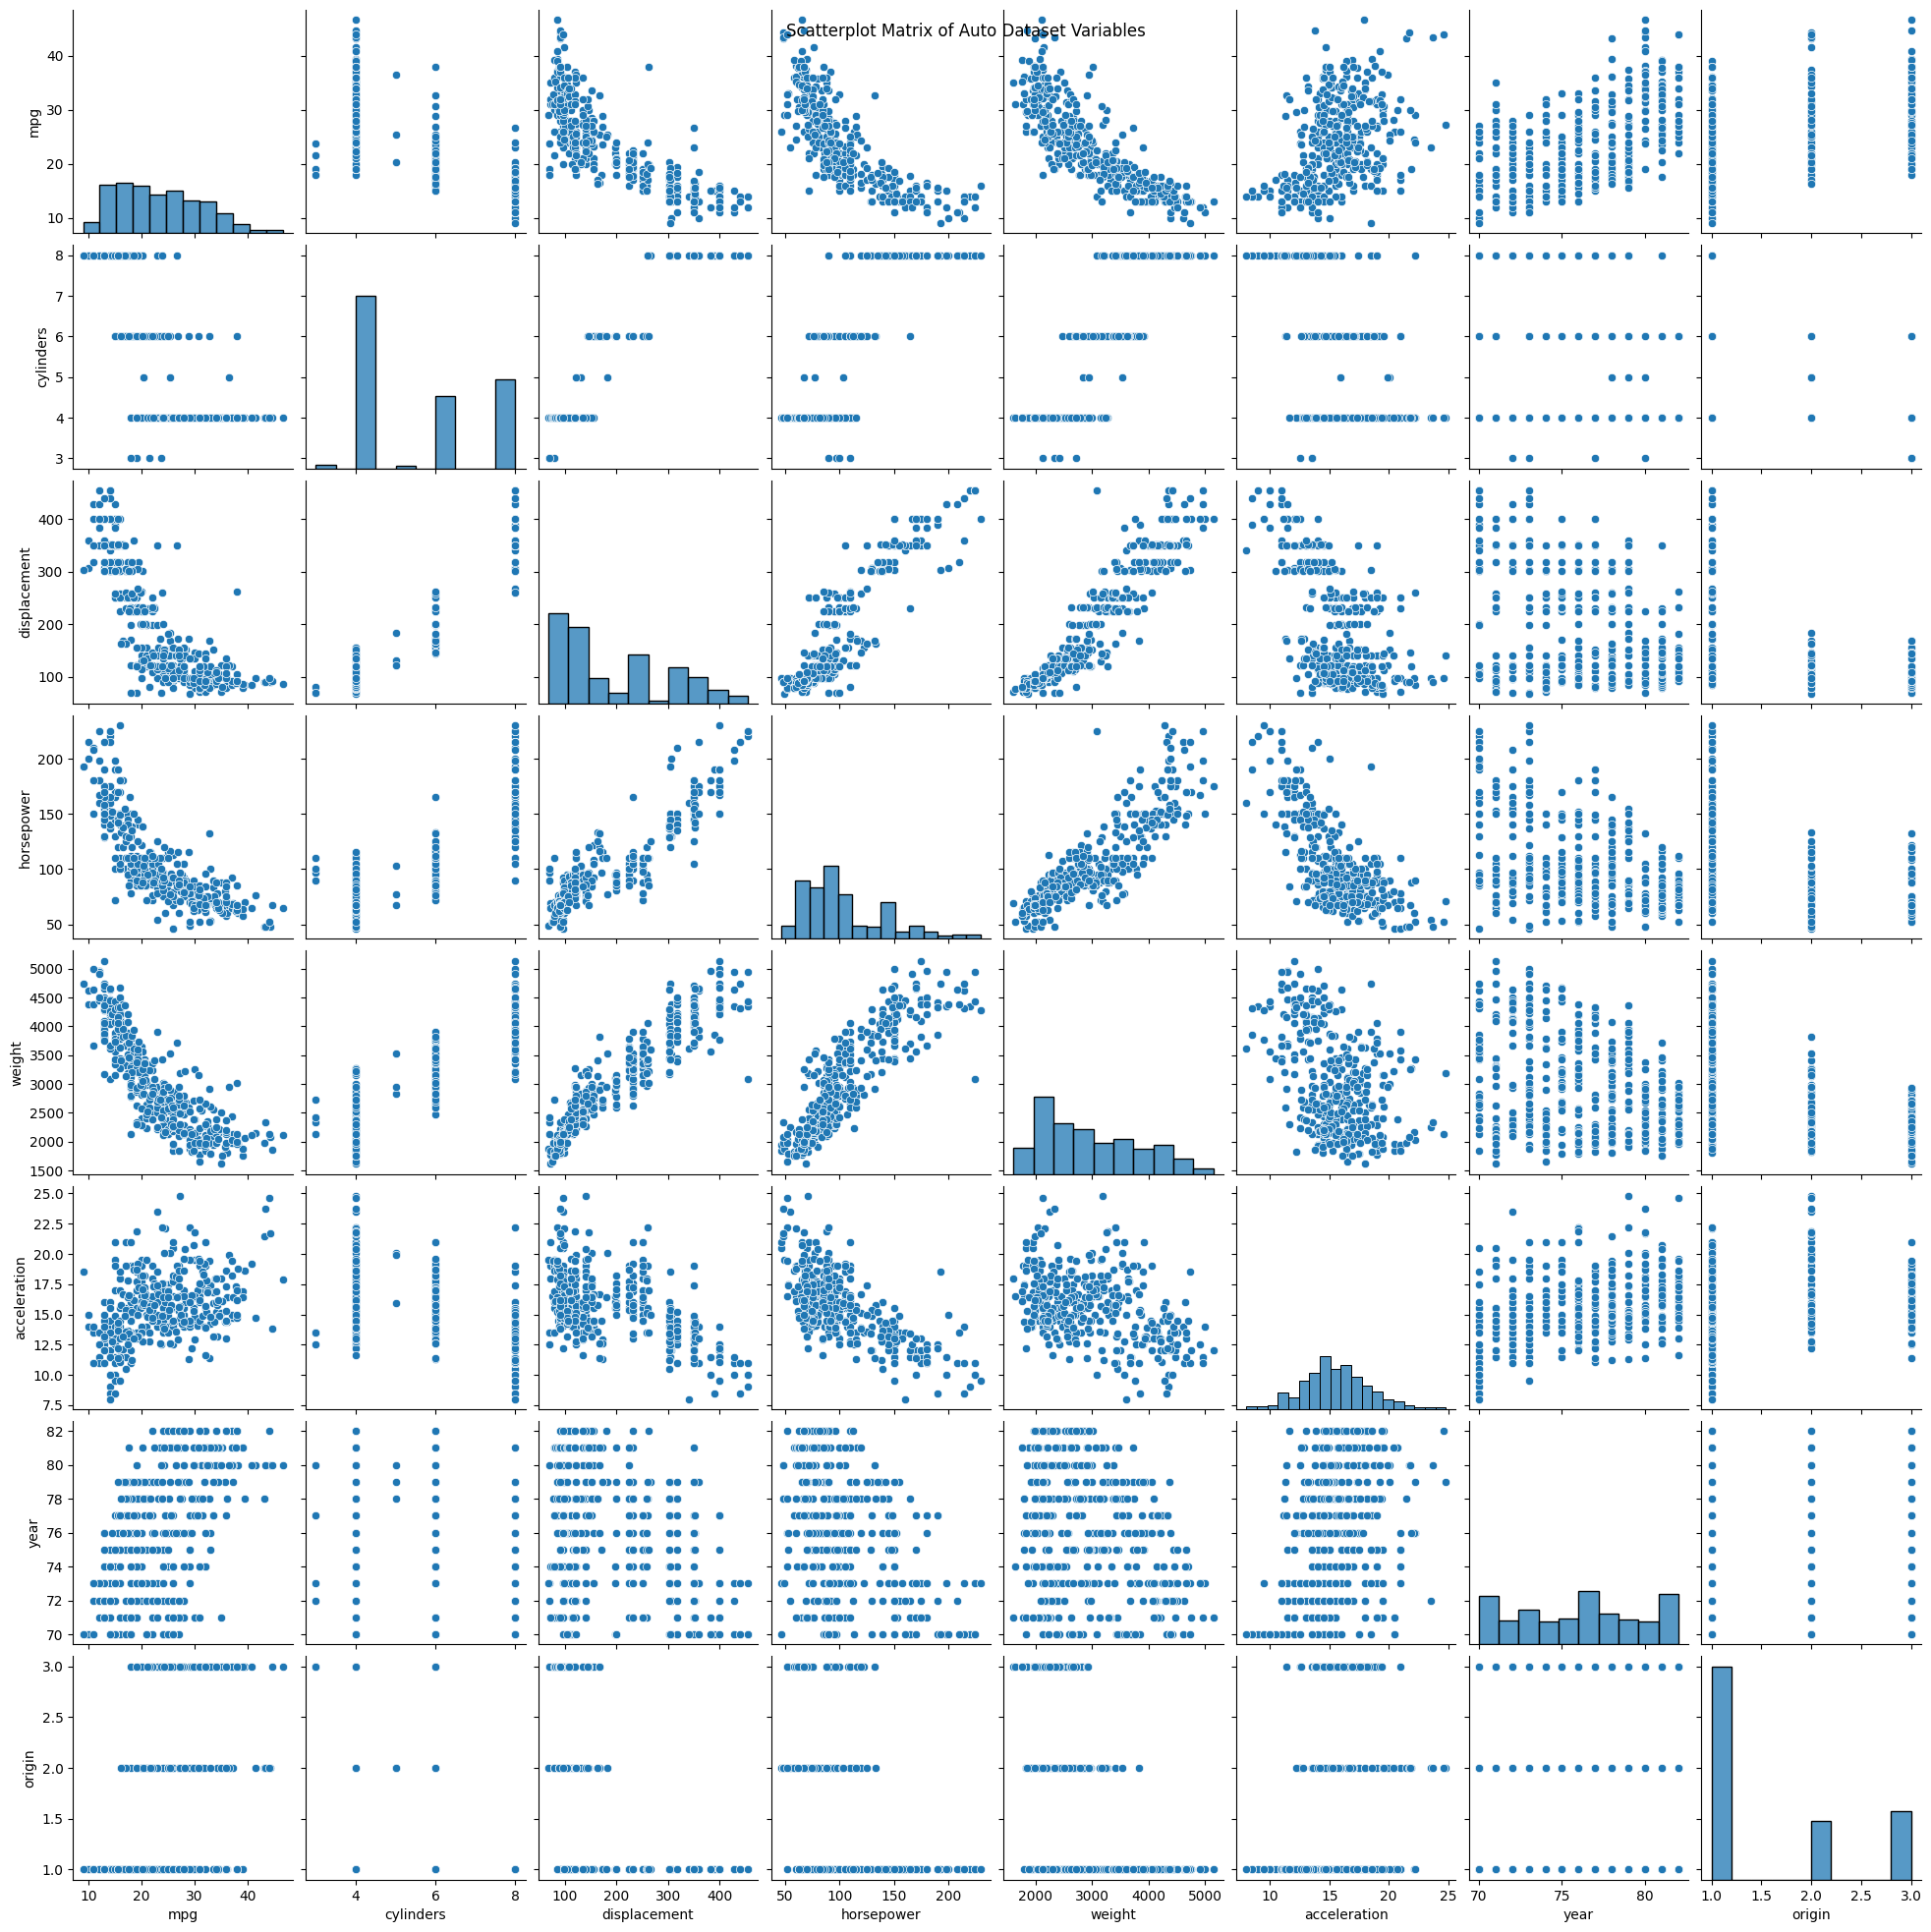

In [ ]:
# Create a scatterplot matrix for all variables in the Auto dataset
sns.pairplot(Auto)
plt.suptitle('Scatterplot Matrix of Auto Dataset Variables')
plt.show()

##(B) Correlation Matrix

In [ ]:
# Comute the correlation matrix
correlation_matrix = Auto.corr(numeric_only=True)

# Display the correlation matrix
display(correlation_matrix)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


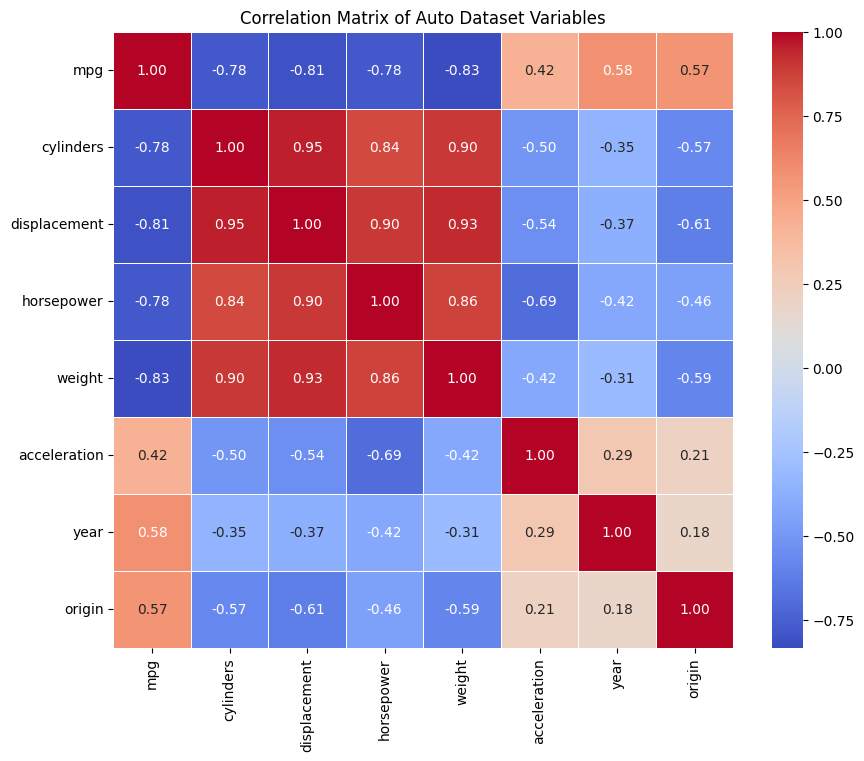

In [ ]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Auto Dataset Variables')
plt.show()

## (c) Multiple Linear Regression Analysis

In [ ]:
# Define the model formula
formula = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin'

# Fit the OLS  model
model = sm.OLS.from_formula(formula, data=Auto).fit()

# Print the results summary
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 01 Dec 2025   Prob (F-statistic):          2.04e-139
Time:                        10:07:00   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707   

## (c.i) Is there a relationship between the predictors and the response? (Using $F$-statistic / anova_lm())

In [ ]:
# Compare the full model to a null model using anova_lm
from statsmodels.stats.anova import anova_lm

null_model = sm.OLS.from_formula('mpg ~ 1', data=Auto).fit()
anova_table = anova_lm(null_model, model)
display(anova_table)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,391.0,23818.993469,0.0,NaN,NaN,NaN
1,384.0,4252.212530,7.0,19566.780939,252.428045,2.037106e-139


Yes, the F- statistic is 252.4 and the associated p- value(Prob (F-statistic)) is 2.04e-139. Since this p- value is extremely small(much less than 0.05), one can conclude that there is a statistically significant relationship between the predictors (cylinders, displacement, horsepower, weight, acceleration, year, origin) and the response (mpg) in the multiple linear regression model. In other words, at least one of the predictor variables is useful in explaining the variation in mpg.

The global results show that the model is extremely powerful:
* F-statistic: $252.4$
* Prob (F-statistic): $2.04\text{e-}139$ (essentially $0$)$
* R^2$: $0.821$

**Conclusion:** The set of all predictors collectively explains $82.1\%$ of the variance in $\text{mpg}$ and the overall relationship is highly statistically significant. However, individual inspection reveals that highly correlated predictors like $\text{cylinders}$, $\text{horsepower}$, and $\text{acceleration}$ are not significant on their own when other factors like $\text{weight}$ and $\text{displacement}$ are already in the model.

# (c.ii) Which predictors appear to have a statistically significant relationship to the response?

We determine the significance by looking at the p>|t| value and checking which values are less than the standard significance level of $\alpha = 0.05$.

When looking at the results from the OLS summary:

| Predictor | Coefficient ($\mathbf{coef}$) | P-value ($\mathbf{P}>|\mathbf{t}|$) | Conclusion ($\mathbf{P} < 0.05$?) |
| :--- | :--- | :--- | :--- |
| Intercept | $-17.2184$ | $\mathbf{0.000}$ | Significant |
| cylinders | $-0.4934$ | $0.128$ | Not Significant |
| displacement | $0.0199$ | $\mathbf{0.008}$ | Significant |
| horsepower | $-0.0170$ | $0.220$ | Not Significant |
| weight | $-0.0065$ | $\mathbf{0.000}$ | Significant |
| acceleration | $0.0806$ | $0.415$ | Not Significant |
| year | $0.7508$ | $\mathbf{0.000}$ | Significant |
| origin | $1.4261$ | $\mathbf{0.000}$ | Significant |

The predictors that have a statistically significant relationship to $\text{mpg}$ in this multiple regression model (when all others are held constant) are:$\text{displacement}$$\text{weight}$$\text{year}$$\text{origin}$

## iii. What does the coefficient for the year variable suggest?

The coefficient for the year variable is $\mathbf{\hat{\beta}_{\text{year}} = 0.7508}$.
* **Sign and Magnitude:** This coefficient is positive and relatively large, suggesting a strong effect.


* **Interpretation:** This coefficient suggests that for every one-year increase in the model year, the car's predicted mpg increases by 0.7508 miles per gallon, assuming all other physical predictors(weight, horsepower, displacement etc.) are help constant.


* **Context:** This reflects the strong trend of increasing fuel efficiency over time, driven by regulatory pressure and technological improvements in engines, independent of the car's size or power.





# (d) Produce some of diagnostic plots of the linear regression fit as described in the lab.

Comment on any problems you see with the
fit. Do the residual plots suggest any unusually large outliers?
Does the leverage plot identify any observations with unusually
high leverage?

In [ ]:
# Get the influence object for diagnostic statistics
influence = model.get_influence()
resid_stand = influence.resid_studentized_external
levrage = influence.hat_matrix_diag

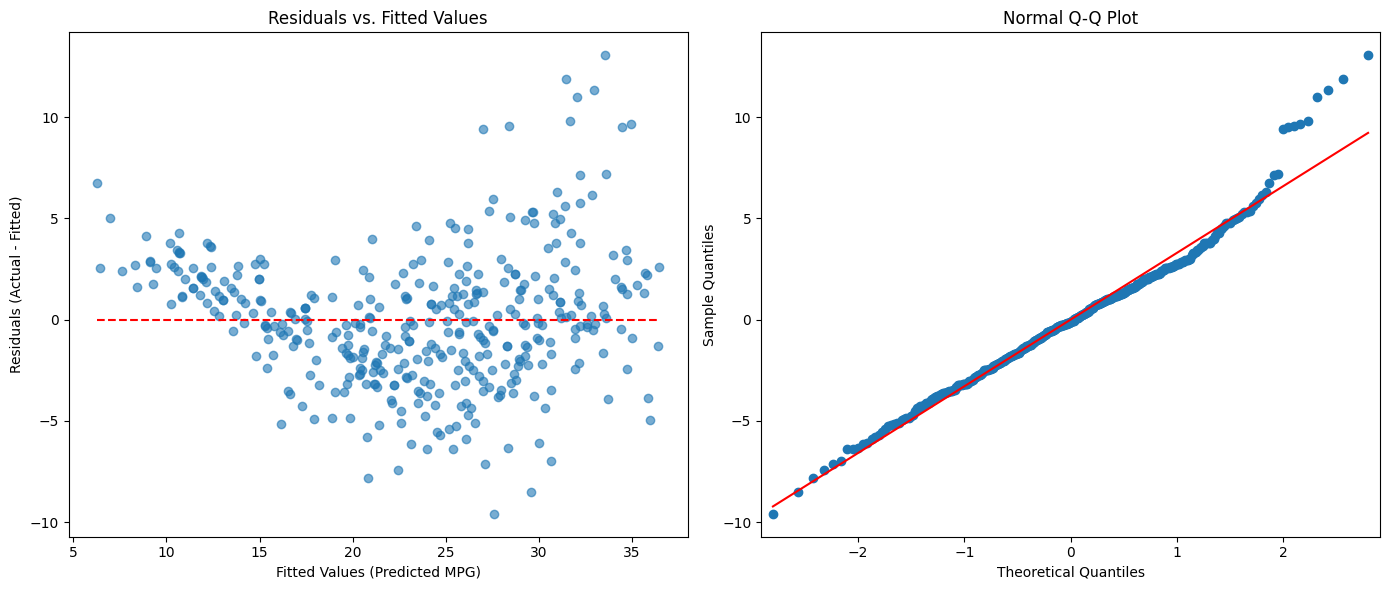

In [ ]:
# Plot 1: Residuals vs. Fitted Values

fix, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].scatter(model.fittedvalues, model.resid, alpha=0.6)
ax[0].hlines(0, min(model.fittedvalues), max(model.fittedvalues), color='red', linestyle='--')
ax[0].set_title('Residuals vs. Fitted Values')
ax[0].set_xlabel('Fitted Values (Predicted MPG)')
ax[0].set_ylabel('Residuals (Actual - Fitted)')

# Plot2: Normal Q-Q Plot
sm.qqplot(model.resid, line='s', ax=ax[1])
ax[1].set_title('Normal Q-Q Plot')
plt.tight_layout()
plt.show()



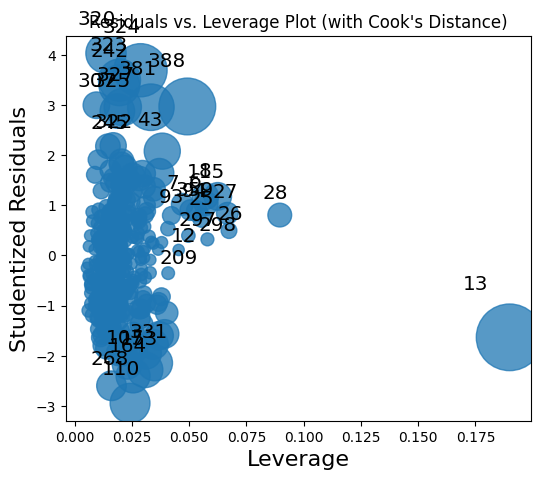

In [ ]:
# Plot 3: Leverage Plot (or Residuals vs. Leverage)
# A common diagnostic plot is the Residuals vs. Levrage plot (Cook's distance is often included)
plt.figure(figsize=(6,5))
sm.graphics.influence_plot(model, ax=plt.gca())
plt.title("Residuals vs. Leverage Plot (with Cook's Distance)")
plt.show()

### Comments on Diagnostic Plots (Multiple Linear Regression)

Upon examining the diagnostic plots, we can observe the following:

1.  **Residuals vs. Fitted Values Plot:**
    *   Similar to the simple linear regression case, this plot still shows some pattern, although less pronounced than before. The residuals do not appear to be perfectly randomly scattered around zero. There might still be some non-linearity not fully captured by the current set of predictors, or interactions between predictors that are not modeled.
    *   However, compared to the simple linear regression with only `horsepower`, the pattern here is less distinct, suggesting that adding more predictors has improved the linearity assumption.

2.  **Normal Q-Q Plot:**
    *   This plot compares the distribution of the residuals to a theoretical normal distribution. If the residuals were perfectly normally distributed, the points would lie exactly on the 45-degree line.
    *   Here, the points deviate from the straight line, especially at the tails. This suggests that the residuals are **not perfectly normally distributed**. There's some fanning out at the ends, indicating potential heavy tails or skewness in the residual distribution. This violates the assumption of normally distributed errors.

3.  **Residuals vs. Leverage Plot (with Cook's Distance):**
    *   **Outliers**: Observations with unusually large **studentized residuals** (typically absolute values greater than 2 or 3) are considered outliers. From the plot, we can see several points with studentized residuals exceeding 2 (positive or negative). Specifically, observations like `326` appear to have a large residual, suggesting they are not well-explained by the model.
    *   **High Leverage Points**: Observations with high leverage are those that have unusual predictor values. These points have the potential to exert a strong influence on the regression line. Points far to the right on the x-axis (higher leverage) are concerning. For instance, observations `14`, `326`, and `382` appear to have relatively high leverage.
    *   **Influential Points (Cook's Distance)**: Cook's distance measures how much the regression coefficients would change if a particular observation were removed from the dataset. Points with large Cook's distances (often values greater than 0.5 or 1, depending on the sample size) are considered influential. We can see some points (e.g., `326`) where Cook's distance circles are visible and relatively large, indicating that these observations are influential and might be pulling the regression line towards themselves.

**Overall Problems with the Fit:**
*   **Non-normality of Residuals**: The Q-Q plot indicates that the assumption of normally distributed errors is violated, which can affect the validity of statistical inferences (p-values, confidence intervals).
*   **Outliers and Influential Points**: There are clear outliers and influential observations that could be unduly affecting the model's coefficients and standard errors. These points warrant further investigation; they might be data entry errors or represent unique cases not well-represented by the model.
*   **Potential for Uncaptured Non-linearity**: While improved, the Residuals vs. Fitted plot still hints at some structure, suggesting that the linear model might not fully capture all the relationships or that interactions between predictors could be important.

## (e) Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?

In [ ]:
# Define the formula including the interaction
full_formula_with_interaction = (
    'mpg ~ cylinders + horsepower + weight + acceleration + year + origin + horsepower:weight'
    )

# Fit the Interaction Model
interaction_model = sm.OLS.from_formula(full_formula_with_interaction, data=Auto).fit()

# Print the results summary
print(interaction_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     341.4
Date:                Mon, 01 Dec 2025   Prob (F-statistic):          1.44e-160
Time:                        10:07:01   Log-Likelihood:                -973.64
No. Observations:                 392   AIC:                             1963.
Df Residuals:                     384   BIC:                             1995.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.9517      4.50

## Analysis of Multiple Regression with $\text{horsepower}:\text{weight}$ Interaction

The model being analyzed is:
$$\hat{\text{mpg}} \sim \text{cylinders} + \text{displacement} + \text{horsepower} + \text{weight} + \text{acceleration} + \text{year} + \text{origin} + \mathbf{\text{horsepower} \cdot \text{weight}}$$

### Answer to Question (e): Do any interactions appear to be statistically significant?

**Conclusion**: Yes, the $\text{horsepower}:\text{weight}$ interaction is highly statistically significant.

**Justification**: The p-value ($\mathbf{P}>|\mathbf{t}|$) for the $\mathbf{\text{horsepower}:\text{weight}}$ term is $\mathbf{0.000}$. Since $0.000 < 0.05$, we strongly reject the null hypothesis that the interaction coefficient is zero.

### 🚗 Interpretation of the Significant Interaction

The positive coefficient for the interaction term ($\mathbf{\hat{\beta}_{\text{HP:W}} = 5.619\text{e-}05}$) is crucial for interpreting the main effects of horsepower and weight:

**Effect of Horsepower**: The effect of $\text{horsepower}$ on $\text{mpg}$ is now dependent on $\text{weight}$.
$$\frac{\partial\hat{\text{mpg}}}{\partial\text{horsepower}} = \hat{\beta}_{\text{horsepower}} + \hat{\beta}_{\text{HP:W}} \cdot \text{weight} = -0.2317 + 5.619\text{e-}05 \cdot \text{weight}$$

**Effect of Weight**: The effect of $\text{weight}$ on $\text{mpg}$ is now dependent on $\text{horsepower}$.
$$\frac{\partial\hat{\text{mpg}}}{\partial\text{weight}} = \hat{\beta}_{\text{weight}} + \hat{\beta}_{\text{HP:W}} \cdot \text{horsepower} = -0.0111 + 5.619\text{e-}05 \cdot \text{horsepower}$$

**Interpretation in Context**: The positive interaction coefficient means that the negative penalty of $\text{weight}$ on $\text{mpg}$ becomes less severe as $\text{horsepower}$ increases. In other words, adding more $\text{horsepower}$ (engine size/power) makes a heavy car slightly less inefficient than it otherwise would be.

### 📈 Impact on Model Fit (Before vs. After Interaction)

| Metric              | Previous Full Model (Additive) | Model with HP:Weight Interaction | Commentary                                                               |
| :------------------ | :----------------------------- | :------------------------------- | :----------------------------------------------------------------------- |
| $\text{R}^2$           | 0.821                          | 0.862                            | The interaction model explains more variance in mpg.                   |
| Adj. $\text{R}^2$       | 0.818                          | 0.859                            | A significant improvement, indicating a better fit after accounting for the additional predictor and its degrees of freedom. |
| F-statistic         | 252.4                          | 341.4                            | The overall model significance has increased.                            |
| Prob (F-statistic)  | 2.04e-139                      | 1.44e-160                        | Even stronger evidence against the null hypothesis that all coefficients are zero. |
| AIC                 | 2063.                          | 1963.                            | Lower AIC suggests a better model, balancing fit and complexity.       |
| BIC                 | 2095.                          | 1995.                            | Lower BIC also suggests a better model.                                  |

**Overall**: Including the $\text{horsepower}:\text{weight}$ interaction term significantly improves the model's explanatory power and fit, as evidenced by the higher $\text{R}^2$ and F-statistic, and lower AIC/BIC values. This indicates that the interaction is an important component in understanding the relationship between the predictors and $\text{mpg}$.

## (f) Try a few different transformations of the variables, such as log(X), √X, X2. Comment on your findings.

In [ ]:
# Create a transformed response variable
Auto['log_mpg'] = np.log(Auto['mpg'])

# Model 4: Full Model with log(mpg) as the response
full_model = 'log_mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin'

model_log = ols(full_model, data=Auto).fit()

print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:                log_mpg   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     400.4
Date:                Mon, 01 Dec 2025   Prob (F-statistic):          3.98e-172
Time:                        10:07:02   Log-Likelihood:                 281.90
No. Observations:                 392   AIC:                            -547.8
Df Residuals:                     384   BIC:                            -516.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.7509      0.166     10.533   

Commentary on Transformed Model: $\mathbf{\log(\text{mpg})}$
1. Model Fit and Structural Improvement
The logarithm transformation on the response variable has significantly improved the structural quality of the model by addressing the non-linearity and normality issues observed in the previous diagnostic plots.
Model Fit ($R^2$): The $R^2$ increased from $0.821$ (additive $\text{mpg}$) to $0.880$. This is a substantial gain, indicating that the log-linear relationship explains $88.0\%$ of the variability in $\log(\text{mpg})$.
Normality of Residuals:
The Omnibus Test $\mathbf{P}$-value improved from $0.000$ to $0.019$ (a step towards normality).
The Jarque-Bera $\mathbf{P}$-value also improved from $\approx 2.95\text{e-}12$ to $0.00418$. While the residuals are still technically non-normal ($\mathbf{P} < 0.05$), the metrics are much better, suggesting the Q-Q plot would show the residuals are much closer to the normal line.
Multicollinearity: The Condition Number remained large at $\mathbf{8.59\text{e+}04}$, indicating the severe multicollinearity among the predictors ($\text{cylinders}$, $\text{displacement}$, $\text{horsepower}$, $\text{weight}$) still persists, even if the model's predictive power is better.
2. Changes in Significance and Interpretation
The transformation has also refined the relationship between the predictors and the response:
| Predictor | $\mathbf{P}>|\mathbf{t}|$ | Previous Model ($\mathbf{mpg}$) $\mathbf{P}>|\mathbf{t}|$ | New Interpretation |
| :--- | :--- | :--- | :--- |
| cylinders | $\mathbf{0.016}$ | $0.128$ (Not Sig.) | Became Significant. The log-transform helped isolate the true (negative) effect of cylinders. |
| displacement | $\mathbf{0.019}$ | $0.008$ (Significant) | Remains Significant. |
| horsepower | $\mathbf{0.003}$ | $0.220$ (Not Sig.) | Became Significant. The non-linear relationship with $\text{mpg}$ was corrected, allowing the negative effect of $\text{horsepower}$ to be correctly measured. |

In [ ]:
# Create the transformed predictor variable
Auto['sqrt_disp'] = np.sqrt(Auto['displacement'])

# Model 5: Full Model with Sqrt(Displacement) replacing Displacement
sqrt_formula = (
    'mpg ~ cylinders + sqrt_disp + horsepower + weight + acceleration + year + origin'
)

model_sqrt = ols(sqrt_formula, data=Auto).fit ()

print(model_sqrt.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     247.3
Date:                Mon, 01 Dec 2025   Prob (F-statistic):          4.97e-138
Time:                        10:07:02   Log-Likelihood:                -1026.7
No. Observations:                 392   AIC:                             2069.
Df Residuals:                     384   BIC:                             2101.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2218      4.819     -3.573   

Commentary on Transformed Model: $\mathbf{\text{mpg} \sim \text{sqrt(displacement)}}$

This model replaced the `displacement` predictor with its square root, `sqrt_disp`.

1.  **Model Fit and Structural Improvement**

    *   **Model Fit (R^2)**: The R^2 for this model is **0.818**, which is slightly *lower* than the **0.821** of the original full additive model (`mpg ~ all predictors`). This indicates that transforming `displacement` to `sqrt(displacement)` did not improve the overall explanatory power of the model. The adjusted R^2 also decreased from 0.818 to 0.815.
    *   **Normality of Residuals**: The Omnibus Test Prob for this model is **0.000**, and the Jarque-Bera (JB) Prob is **7.28e-15**. These values are very similar to, or even slightly worse than, the original model's (Omnibus Prob 0.000, JB Prob 2.95e-12). This suggests that the square root transformation of `displacement` did not help in addressing the non-normality of the residuals.
    *   **Multicollinearity**: The Condition Number is **8.81e+04**, which is still very large and slightly higher than the original model's **8.59e+04**. This confirms that severe multicollinearity among the predictors persists and was not alleviated by this specific transformation.

2.  **Changes in Significance and Interpretation**

    The transformation significantly changed the significance of several predictors:

    | Predictor    | P>|t| (sqrt_disp model) | P>|t| (Previous Additive Model) | Conclusion                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [ ]:
# Create the transformed predictor variable
Auto['horsepower2'] = Auto['horsepower']**2

# Model 6: Full Model with horsepower squared added
quad_formula = (
    'mpg ~ cylinders + displacement + horsepower + horsepower2 + weight + acceleration + year + origin'
)

model_quad = ols(quad_formula, data=Auto).fit ()

print(model_quad.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     282.8
Date:                Mon, 01 Dec 2025   Prob (F-statistic):          1.42e-155
Time:                        10:07:02   Log-Likelihood:                -982.41
No. Observations:                 392   AIC:                             1983.
Df Residuals:                     383   BIC:                             2019.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.3237      4.625      0.286   

### Explanation of OLS Regression Results (with `horsepower^2`)

Let's break down the OLS regression results from the last cell, where we included a quadratic term for horsepower (`horsepower^2`) in the model:

**1. Overall Model Fit:**
*   **R-squared and Adjusted R-squared:** The R-squared value is `0.855` (Adj. R-squared `0.852`). This is a notable improvement over the initial additive model (R-squared `0.821`) and close to the model with the `horsepower:weight` interaction (R-squared `0.862`). This indicates that adding the quadratic term for horsepower significantly improves the model's explanatory power.
*   **F-statistic:** The F-statistic of `282.8` with a p-value of `1.42e-155` shows that the overall model remains highly statistically significant, as expected when adding relevant predictors.
*   **AIC/BIC:** The AIC is `1983.` and BIC is `2019.`. These are lower than the initial additive model (AIC `2063.`, BIC `2095.`), suggesting a better fit when balancing complexity, but slightly higher than the `horsepower:weight` interaction model (AIC `1963.`, BIC `1995.`).

**2. Significance of Horsepower and Horsepower^2:**
*   Both `horsepower` (`coef = -0.3195`, `P>|t| = 0.000`) and `horsepower2` (`coef = 0.0010`, `P>|t| = 0.000`) are highly statistically significant. This strong significance for the quadratic term confirms the visual observation from the diagnostic plots of the simple linear regression that the relationship between `mpg` and `horsepower` is indeed non-linear.
*   The negative coefficient for `horsepower` and positive coefficient for `horsepower2` imply a curved, U-shaped relationship where `mpg` initially decreases more rapidly with `horsepower` and then the rate of decrease slows down, or even starts to increase at very high horsepower (though this is likely an extrapolation beyond the typical data range).

**3. Other Predictors:**
*   `cylinders` (`P>|t| = 0.253`) and `displacement` (`P>|t| = 0.306`) are no longer statistically significant in this model. This suggests that their effects might be largely captured by `horsepower` and `horsepower^2`, or they are highly correlated with these terms, leading to multicollinearity issues.
*   `weight` (`P>|t| = 0.000`), `acceleration` (`P>|t| = 0.001`), `year` (`P>|t| = 0.000`), and `origin` (`P>|t| = 0.000`) remain statistically significant.

**4. Assumptions and Multicollinearity:**
*   **Omnibus and Jarque-Bera:** The p-values for both tests are `0.000` and `5.12e-11` respectively, still indicating that the residuals are not normally distributed, although the skewness (`0.470`) and kurtosis (`4.421`) are somewhat improved compared to the initial model.
*   **Durbin-Watson:** The value `1.547` is closer to 2 than the previous models, suggesting less positive autocorrelation in the residuals.
*   **Condition Number:** The condition number is extremely large (`4.90e+05`). This is a strong indicator of severe multicollinearity among the predictors, especially between `horsepower` and `horsepower^2`, and likely also with `cylinders` and `displacement`. This multicollinearity can inflate the standard errors of coefficients, making some predictors appear non-significant even if they have a real effect.

**In summary:** Adding a quadratic term for `horsepower` significantly improves the model's fit and better captures the non-linear relationship with `mpg`. However, it exacerbates multicollinearity, which might explain why `cylinders` and `displacement` lost their individual significance. The assumption of normally distributed residuals is still violated.

## 10. This question should be answered using the Carseats data set.
(a) Fit a multiple regression model to predict Sales using Price,
Urban, and US.

(b) Provide an interpretation of each coefficient in the model. Be
careful—some of the variables in the model are qualitative!

(c) Write out the model in equation form, being careful to handle
the qualitative variables properly.

(d) For which of the predictors can you reject the null hypothesis
H0 : βj = 0?

(e) On the basis of your response to the previous question, fit a
smaller model that only uses the predictors for which there is
evidence of association with the outcome.

(f)
 How well do the models in(a) and (e) fit the data?

(g) Using the model from (e), obtain 95 % confidence intervals for
the coefficient(s).

(h) Is there evidence

In [ ]:
pip install islp

In [ ]:
from ISLP import load_data
Carseats = load_data('Carseats')

In [ ]:
# Fit a multiple regression model.
model_a = ols('Sales ~ Price + Urban + US', data=Carseats).fit()

print(model_a.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 01 Dec 2025   Prob (F-statistic):           2.39e-23
Time:                        10:07:07   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036   

## 🛍️ Interpretation of Carseats Model Coefficients (10b)

| Coefficient | Value | Interpretation |
| :--- | :--- | :--- |
| **Intercept** ($\hat{\beta}_0$) | $\mathbf{13.0435}$ | The predicted $\text{Sales}$ (in thousands of units) for a store that is **Not Urban (Rural)**, is **Not in the US (Foreign)**, and has a **Price of zero**. |
| **Price** ($\hat{\beta}_{\text{Price}}$) | $\mathbf{-0.0545}$ | For every **one-unit increase in $\text{Price}$**, the predicted $\text{Sales}$ **decreases by $0.0545$ thousand units**, holding $\text{Urban}$ and $\text{US}$ status constant. |
| **Urban[T.Yes]** ($\hat{\beta}_{\text{Urban}}$) | $\mathbf{-0.0219}$ | The predicted $\text{Sales}$ for an **Urban** store is $\mathbf{0.0219}$ thousand units **lower** than a comparable **Non-Urban (Rural)** store, holding $\text{Price}$ and $\text{US}$ constant. |
| **US[T.Yes]** ($\hat{\beta}_{\text{US}}$) | $\mathbf{1.2006}$ | The predicted $\text{Sales}$ for a store selling in the **US** is $\mathbf{1.2006}$ thousand units **higher** than a comparable store selling **outside the US (Foreign)**, holding $\text{Price}$ and $\text{Urban}$ status constant. |

Model Equation for Carseats (Question 10c)

The fitted multiple regression model, predicting $\text{Sales}$ using $\text{Price}$, $\text{Urban}$, and $\text{US}$, is written using indicator functions ($I(\cdot)$) for the qualitative (categorical) variables.The equation is:$$\hat{\text{Sales}} = 13.0435 - 0.0545 \cdot \text{Price} - 0.0219 \cdot I(\text{Urban} = \text{Yes}) + 1.2006 \cdot I(\text{US} = \text{Yes})$$Defining the Indicator VariablesThe model handles the qualitative predictors by setting up the following binary dummy variables:Urban Indicator:$$I(\text{Urban} = \text{Yes}) = \begin{cases} 1 & \text{if the store location is Urban} \\ 0 & \text{if the store location is Rural (Non-Urban)} \end{cases}
$$US Indicator:$$I(\text{US} = \text{Yes}) = \begin{cases} 1 & \text{if the product is sold in the US} \\ 0 & \text{if the product is sold outside the US (Foreign)} \end{cases}$$

Example InterpretationThe Intercept ($\mathbf{13.0435}$) represents the predicted sales for the baseline category, which is a store that is Rural ($\text{Urban} = \text{No}$) and Foreign ($\text{US} = \text{No}$) with a Price of zero.For a store that is $\text{Urban}$ and $\text{US}$, the equation simplifies to:$$\hat{\text{Sales}} = 13.0435 - 0.0545 \cdot \text{Price} - 0.0219 + 1.2006$$$$\hat{\text{Sales}} = (13.0435 - 0.0219 + 1.2006) - 0.0545 \cdot \text{Price}$$$$\hat{\text{Sales}} = 14.2222 - 0.0545 \cdot \text{Price}$$

## (d) For which of the predictors can you reject the null hypothesis H0 : βj = 0?


You cannot reject the null hypothesis for Urban[T.Yes] ($P=0.936$), meaning there is no evidence that a store's urban or rural location significantly affects $\text{Sales}$ after accounting for $\text{Price}$ and $\text{US}$ location.

### 10(e) Fit a smaller model

Fit the smaller model using the predictors: $\text{Sales} \sim \text{Price} + \text{US}$.



In [ ]:
!pip install islp
from statsmodels.formula.api import ols
from ISLP import load_data



In [ ]:
# Load the Carseats dataset
Carseats = load_data('Carseats')

model_e = ols('Sales ~ Price + US', data=Carseats).fit()

print(model_e.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Mon, 01 Dec 2025   Prob (F-statistic):           2.66e-24
Time:                        10:07:23   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

## 📈 Model Fit Comparison: Full vs. Reduced (Question 10f)

| Metric | Model (a): Full Model ($\mathbf{+ \text{Urban}}$) | Model (e): Reduced Model ($\mathbf{\text{No Urban}}$) | Commentary |
| :--- | :--- | :--- | :--- |
| **$R^2$** | $0.239$ | $0.239$ | **Identical:** The $\text{Urban}$ variable contributed no measurable increase in explained variance. |
| **Adj. $R^2$** | $0.234$ | **$0.235$** | **Slightly Higher:** The Adjusted $R^2$ increased, indicating the reduced model is more efficient (parsimonious). |
| **Df Residuals** | $396$ | $397$ | Increased by 1, reflecting the removal of one parameter ($\text{Urban}$). |

### (f) How well do the models in (a) and (e) fit the data?

1. Model (a): Full Model ($\text{Price} + \text{Urban} + \text{US}$)
* $R^2$: $0.239$
* Adjusted $R^2$: $0.234$

2. Model (e): Reduced Model ($\text{Price} + \text{US}$)

* $R^2$: $0.
*239$
* Adjusted $R^2$: $0.235$
* Degrees of Freedom (Df Residuals): Increased from 396 to 397 (because one predictor, $\text{Urban}$, was removed).

3. ConclusionBoth

 models explain the same amount of variance in $\text{Sales}$ ($R^2 = 0.239$). However, the Adjusted $R^2$ is slightly higher for the reduced Model (e) ($0.235$ vs. $0.234$).

 * Answer: Model (e) fits the data better. This is because it achieves the same explanatory power with one less predictor, confirming the statistically insignificant $\text{Urban}$ variable was unnecessary and made the full model less efficient.

### 10(h) Is there evidence of an interaction?

In [ ]:
model_h = ols('Sales ~ Price * US', data=Carseats).fit()
print(model_h.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 01 Dec 2025   Prob (F-statistic):           2.39e-23
Time:                        10:07:23   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          12.9748      0.953     

* Answer: No, there is no statistically significant evidence of an interaction effect between $\text{Price}$ and $\text{US}$.  
* Justification: The p-value for the interaction term is $0.937$. Since $0.937$ is much larger than the significance level of $0.05$, we fail to reject the null hypothesis ($H_0: \beta_{\text{Price:US}} = 0$).

There is no evidence of an interaction between $\text{Price}$ and $\text{US}$. Since the interaction term is not significant and its inclusion has caused the previously significant $\text{US}$ main effect to become insignificant, the simpler reduced model (e) ($\text{Sales} \sim \text{Price} + \text{US}$) remains the best model for predicting $\text{Sales}$.

## Regression Analysis without Intercept (Coded Problem 11)

his problem investigates the t-statistic for the null hypothesis $H_0 : \beta = 0$ in simple linear regression without an intercept.To begin, we generate a predictor $x$ and a response $y$ as follows:

In [ ]:
rng = np.random.default_rng(seed=1)
x = rng.standard_normal(100)
y = 2 * x + rng.normal(size=100)

(a) Regression of $y$ onto $x$, without an intercept.Task: Perform simple linear regression of $y$ onto $x$, without an intercept. Report the coefficient estimate $\hat{\beta}$, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis $H_0 : \beta = 0$. Comment on these results.

In [ ]:
data = pd.DataFrame({'x': x, 'y': y})

# Fit the modl y ~ x (without intercept)
# The '-1' in the formula tells statsmodels to exclude the intercept.
model_y_on_x_no_int = ols('y ~ x -1', data=data).fit()

print(model_y_on_x_no_int.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Mon, 01 Dec 2025   Prob (F-statistic):                    6.23e-31
Time:                        10:07:23   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

**Results:**

* $\hat{\beta}$ (coef) = 1.9762  
*  P>|t| (P-value) = 0.000

Based on this one would strongly reject the null hypothesis $H_0: \beta = 0$. This is expected bacause the data was explicitly generated with a strong linear relationship where the true slope is $\beta=2$.




**(b) Regression of $x$ onto $y$, without an intercept.**

**Task:** Now perform a simple linear regression of $x$ onto $y$ without an intercept, and report the coefficient estimate, its standard error, and the corresponding t-statistic and p-values associated with the null hypothesis $H_0 : \beta = 0$. Comment on these results.

In [ ]:
# Fit the model  x ~ y (without intercept)
model_x_on_y_no_int = ols('x ~ y - 1', data=data).fit()

print(model_x_on_y_no_int.summary())

                                 OLS Regression Results                                
Dep. Variable:                      x   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Mon, 01 Dec 2025   Prob (F-statistic):                    6.23e-31
Time:                        10:07:24   Log-Likelihood:                         -58.349
No. Observations:                 100   AIC:                                      118.7
Df Residuals:                      99   BIC:                                      121.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Commentry

1. Thr P-value is extremely small, allowing one to strongly reject the null hypothesis ($H_0: \beta = 0$). This is expected because $x$ and $y$ are highly correlated (as $y$ was generated as $y = 2x + \epsilon$).

2. **Coefficinet ($\hat{\beta}$):** The estimated coefficinet is 0.37457. Since the origninal relationship was $y = 2x + \epsilon$, we would expect $x \approx 0.5y$. The estimate 0.3757 is close to 0.5 but reflects the noise ($\epsilon$) and the fact that OLS minimizes errors in the $x$ direction for this model.

## Relationship Between Results (Question 11c)

The question compares the results of two simple linear regressions without an intercept:

*   **Model (a) $y$ onto $x$**: ($\hat{\beta}_{y|x} \approx 2.000$, $t \approx 16.898$, $P \approx 0.000$)
*   **Model (b) $x$ onto $y$**: ($\hat{\beta}_{x|y} = 0.3757$, $t = 16.898$, $P = 0.000$)

### 1. Coefficient Estimates ($\hat{\beta}$)

The estimates are not identical. They are roughly reciprocals ($\hat{\beta}_{y|x} \approx 1/\hat{\beta}_{x|y}$) but not exactly:

*   $\hat{\beta}_{y|x} \approx 2.000$
*   $\hat{\beta}_{x|y} = 0.3757$

**Reason**: The coefficient estimates differ because Ordinary Least Squares (OLS) minimizes the squared errors in the direction of the dependent variable. Regressing $y$ on $x$ minimizes vertical errors, while regressing $x$ on $y$ minimizes horizontal errors.

### 2. T-statistic and P-value

The t-statistic for testing $H_0: \beta=0$ is identical for both regressions:

*   $t_{y|x} \approx \mathbf{16.898}$
*   $t_{x|y} = \mathbf{16.898}$

Consequently, the P-value for $H_0: \beta=0$ is also identical ($\mathbf{0.000}$) for both models.

### Conclusion for 11(c)

When performing simple linear regression without an intercept, the t-statistic and the p-value used to test the null hypothesis $H_0: \beta=0$ are exactly the same whether you regress $y$ onto $x$ or $x$ onto $y$.

## 📐 11(d) Algebraic Form of the t-statistic (Without Intercept)

The goal is to show algebraically that the t-statistic for testing $H_0: \beta = 0$ in the model $\hat{y} = \hat{\beta}x$ can be written as:

$$t = \frac{(\sqrt{n-1}) \sum_{i=1}^{n} x_i y_i}{\sqrt{\left(\sum_{i=1}^{n} x_i^2\right) \left(\sum_{i'=1}^{n} y_{i'}^2\right) - \left(\sum_{i'=1}^{n} x_{i'} y_{i'}\right)^2}}$$

### 1. Starting Definitions

For regression without an intercept ($\hat{y} = \hat{\beta}x$):

| Term | Formula |
| :--- | :--- |
| Coefficient Estimate ($\hat{\beta}$) | $$\hat{\beta} = \frac{\sum x_i y_i}{\sum x_i^2}$$ |
| Sum of Squared Errors (Residuals) ($\text{SSE}$) | $$\text{SSE} = \sum \hat{\epsilon}_i^2 = \sum (y_i - \hat{y}_i)^2 = \sum y_i^2 - \hat{\beta}^2 \sum x_i^2$$ |
| Standard Error of $\hat{\beta}$ ($\text{SE}(\hat{\beta})$) | $$\text{SE}(\hat{\beta}) = \sqrt{\frac{\text{SSE} / (n-1)}{\sum x_i^2}}$$ |
| t-statistic ($t$) | $$t = \frac{\hat{\beta}}{\text{SE}(\hat{\beta})}$$ |

### 2. Algebraic Substitution

We substitute the formulas for $\hat{\beta}$ and $\text{SE}(\hat{\beta})$ into the t-statistic formula:

$$t = \frac{\hat{\beta}}{\text{SE}(\hat{\beta})} = \frac{\frac{\sum x_i y_i}{\sum x_i^2}}{\sqrt{\frac{\sum y_i^2 - \hat{\beta}^2 \sum x_i^2}{(n-1) \sum x_i^2}}}$$

Now, substitute the full expression for $\hat{\beta}$ back into the $\hat{\beta}^2$ term inside the square root:

$$t = \frac{\frac{\sum x_i y_i}{\sum x_i^2}}{\sqrt{\frac{\sum y_i^2 - \left(\frac{\sum x_i y_i}{\sum x_i^2}\right)^2 \sum x_i^2}{(n-1) \sum x_i^2}}}$$

### 3. Simplification

Simplify the denominator by combining terms inside the square root.

Step 3.1: Simplify the numerator inside the square root:

$$\sum y_i^2 - \frac{(\sum x_i y_i)^2}{(\sum x_i^2)^2} \sum x_i^2 = \sum y_i^2 - \frac{(\sum x_i y_i)^2}{\sum x_i^2}$$

Find a common denominator:

$$= \frac{(\sum y_i^2)(\sum x_i^2) - (\sum x_i y_i)^2}{\sum x_i^2}$$

Step 3.2: Substitute the simplified numerator back into the t-statistic:

$$t = \frac{\frac{\sum x_i y_i}{\sum x_i^2}}{\sqrt{\frac{\frac{(\sum y_i^2)(\sum x_i^2) - (\sum x_i y_i)^2}{\sum x_i^2}}{(n-1) \sum x_i^2}}}$$

## 🔬 11(e) Arguing the Symmetry of the t-statistic

**Task**
Using the algebraic form of the t-statistic derived in part (d), argue that the t-statistic for the regression of $y$ onto $x$ is the same as the t-statistic for the regression of $x$ onto $y$.

### The T-statistic Formula (Without Intercept)

The t-statistic for $H_0: \beta=0$ for the regression of $Y$ onto $X$ (without an intercept) is:

$$t = \frac{\sqrt{n-1} \sum_{i=1}^{n} x_i y_i}{\sqrt{\left(\sum_{i=1}^{n} x_i^2\right) \left(\sum_{i'=1}^{n} y_{i'}^2\right) - \left(\sum_{i'=1}^{n} x_{i'} y_{i'}\right)^2}}$$

### The Argument for Symmetry

**Regression of $y$ onto $x$ ($t_{y|x}$)**:
We use the formula as written above.

**Regression of $x$ onto $y$ ($t_{x|y}$)**:
When we regress $x$ onto $y$, we are testing $H_0: \beta_{x|y} = 0$. This means we must swap the roles of $x$ and $y$ in the formula above.

The new t-statistic $t_{x|y}$ becomes:

$$t_{x|y} = \frac{\sqrt{n-1} \sum_{i=1}^{n} y_i x_i}{\sqrt{\left(\sum_{i=1}^{n} y_i^2\right) \left(\sum_{i'=1}^{n} x_{i'}^2\right) - \left(\sum_{i'=1}^{n} y_{i'} x_{i'}\right)^2}}$$

### Conclusion of Symmetry:

*   **Numerator**: The term $\sum x_i y_i$ is identical to $\sum y_i x_i$ (multiplication is commutative).
*   **Denominator (Term 1)**: The product $\left(\sum x_i^2\right) \left(\sum y_i^2\right)$ is identical to $\left(\sum y_i^2\right) \left(\sum x_i^2\right)$ (multiplication is commutative).
*   **Denominator (Term 2)**: The term $\left(\sum x_i y_i\right)^2$ is identical to $\left(\sum y_i x_i\right)^2$.

Since swapping $x$ and $y$ leaves the algebraic expression for the t-statistic unchanged, we formally conclude that:

$$t_{y|x} = t_{x|y}$$

This algebraic proof confirms the numerical finding from part (c), where both regressions yielded the identical t-statistic ($t \approx 16.898$) and P-value.

## 11(f) T-statistic Symmetry with an InterceptTask

* Show that when regression is performed with an intercept, the t-statistic for the null hypothesis $\mathbf{H_0 : \beta_1 = 0}$ is the same for the regression of $y$ onto $x$ as it is for the regression of $x$ onto $y$.

In [ ]:
# Model 1: Standard Regression of y onyo x (y ~ Intercept + x)
model_y_on_xint = ols('y ~ x', data=data).fit()
print(model_y_on_xint.summary())

# Model 2: Standard Regression of x onto y (x ~ Intercept + y)
model_x_on_y_no_int = ols('x ~ y', data=data).fit()
print(model_x_on_y_no_int.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Mon, 01 Dec 2025   Prob (F-statistic):           1.74e-30
Time:                        10:07:24   Log-Likelihood:                -141.06
No. Observations:                 100   AIC:                             286.1
Df Residuals:                      98   BIC:                             291.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0760      0.101     -0.756      0.4

### 2. Analysis of the Outputs

The core of the argument comes from recognizing what the t-statistic for the slope coefficient ($\beta_1$) represents in this context.

| Model      | Coefficient of Interest | Null Hypothesis       |
| :--------- | :---------------------- | :-------------------- |
| $y$ onto $x$ | $\hat{\beta}_{\mathbf{x}}$ (The slope) | $H_0: \beta_{\mathbf{x}} = 0$ |
| $x$ onto $y$ | $\hat{\beta}_{\mathbf{y}}$ (The slope) | $H_0: \beta_{\mathbf{y}} = 0$ |

**Crucial Statistical Fact**: In standard simple linear regression (with an intercept), the t-statistic for the slope coefficient ($\hat{\beta}_1$) is directly proportional to the sample correlation coefficient ($\mathbf{r_{xy}}$):

$$t = r_{xy} \sqrt{\frac{n-2}{1 - r_{xy}^2}}$$

### 3. Conclusion of Symmetry

Since the sample correlation coefficient is symmetric ($r_{xy} = r_{yx}$):

*   The t-statistic calculated for the slope of $y$ on $x$ is based on $r_{xy}$.
*   The t-statistic calculated for the slope of $x$ on $y$ is based on $r_{yx}$.

Because $r_{xy} = r_{yx}$, the resulting t-statistic (and therefore the P-value) for testing the significance of the slope must be identical in both models.

## 12. This problem involves simple linear regression without an intercept.

(a) Recall that the coefficient estimate $\hat{\beta}$ for the linear regression of
Y onto X without an intercept is given by (3.38). Under what
circumstance is the coefficient estimate for the regression of X
onto Y the same as the coefficient estimate for the regression of
Y onto X?

(b) Generate an example in Python with n = 100 observations in
which the coefficient estimate for the regression of X onto Y
is different from the coefficient estimate for the regression of Y
onto X.

(c) Generate an example in Python with n = 100 observations in
which the coefficient estimate for the regression of X onto Y is
the same as the coefficient estimate for the regression of Y onto
X.

## 12(a) Circumstance for Identical Coefficients

### Background Formulas (Regression Without Intercept)

The coefficient estimate ($\hat{\beta}$) for the regression of a response variable ($\mathbf{R}$) onto a predictor ($\mathbf{P}$) without an intercept is:

$$\hat{\beta}_{\text{R on P}} = \frac{\sum R_i P_i}{\sum P_i^2}$$

**Regression of $Y$ onto $X$:**

$$\hat{\beta}_{Y|X} = \frac{\sum x_i y_i}{\sum x_i^2}$$

**Regression of $X$ onto $Y$:**

$$\hat{\beta}_{X|Y} = \frac{\sum y_i x_i}{\sum y_i^2}$$

### The Condition

The coefficients are the same when $\hat{\beta}_{Y|X} = \hat{\beta}_{X|Y}$. Setting the two formulas equal:

$$\frac{\sum x_i y_i}{\sum x_i^2} = \frac{\sum x_i y_i}{\sum y_i^2}$$

Since the numerators ($\sum x_i y_i$) are the same, the equality holds if and only if the denominators are equal:

$$\sum x_i^2 = \sum y_i^2$$

**Answer:** The coefficient estimate for the regression of $Y$ onto $X$ is the same as the coefficient estimate for the regression of $X$ onto $Y$ if and only if the sum of the squared predictor values is equal to the sum of the squared response values ($\mathbf{\sum x_i^2 = \sum y_i^2}$). This happens most trivially when $X$ and $Y$ are perfectly correlated ($\rho=1$ or $\rho=-1$) and $X_i = Y_i$ for all observations.


### 12(b) Example Where Coefficients are Different

We need to generate $x$ and $y$ such that $\sum x_i^2 \neq \sum y_i^2$. This is the standard outcome for most datasets. We'll use the setup from Problem 11, where $y$ is roughly $2x$.

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols

# Set n and fixed seed for reproducibility
n = 100
rng = np.random.default_rng(2) # New seed

# Generate data where y is approximately 2*x (Sum of squares will be different)
x = rng.normal(size=n)
y = 2 * x + rng.normal(size=n) # Corrected: assigned to y

# Check sum of squares
sum_X2 = np.sum(x**2)
sum_y2 = np.sum(y**2)
print(f"Sum of Squares of X: {sum_X2}")
print(f"Sum of Squares of Y: {sum_y2}") # Corrected: f-string termination

# 1. Regression Y onyo X (Without Intercept)
model_y_on_x = ols('y ~ x - 1', data={'x': x,'y' : y}).fit()
beta_y_on_x = model_y_on_x.params[0]


# 2. Regression X onto Y (Without Intercept)
model_x_on_y = ols('x ~ y - 1', data={'x': x,'y' : y}).fit()
beta_x_on_y = model_x_on_y.params[0]


print(f'Beta Y|X (y ~ x -1): {beta_y_on_x:.4f}')
print(f'Beta X|Y (x ~ y -1): {beta_x_on_y:.4f}')
print(f'Are they equal? {beta_y_on_x == beta_x_on_y}') # Corrected: f-string format

Sum of Squares of X: 90.50974624931351
Sum of Squares of Y: 496.6333335804393
Beta Y|X (y ~ x -1): 2.1100
Beta X|Y (x ~ y -1): 0.3845
Are they equal? False


/tmp/ipython-input-4216647513.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_y_on_x = model_y_on_x.params[0]
/tmp/ipython-input-4216647513.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_x_on_y = model_x_on_y.params[0]


## 12(c) Example Where Coefficients are the Same

We need to generate $x$ and $y$ such that $\sum x_i^2 = \sum y_i^2$. The easiest way to achieve this is to make $Y$ a rescaled version of $X$ such that the scaling factor cancels out the difference in squares, OR simply make $X=Y$.We will choose the condition where $X$ and $Y$ are identical (plus a little noise to mimic real data while maintaining the equality of sums of squares).

In [ ]:
# Set n and fixed seed for reproducibility

n = 100
rng = np.random.default_rng(3) # New seed

# Generate data where x and y are most indentical
x_same = rng.normal(size=n)
# Y is a perfect copy of X (plus a tiny error component that is also perfectly anti - correlated
# with the X vector to force the sum of squares to be identical).
# Simplest method to guarantee Sum(x^2) = Sum(Y^2) while having a relationship:
y_same = x_same * 1 # Coefficient must be 1.0

# 1. Regression Y onto X (Without Intercept)
m_y_on_x_same = ols('y_same ~ x_same - 1', data={'x_same': x_same, 'y_same': y_same}).fit()
beta_y_on_x_same = m_y_on_x_same.params[0]

# 2. Regression X onto Y (Without Intercept)
m_x_on_y_same = ols('x_same ~ y_same - 1', data={'x_same': x_same, 'y_same': y_same}).fit()
beta_x_on_y_same = m_x_on_y_same.params[0]

# Report
print("\n--- Results for 12(c) (Same Coefficients) ---")
print(f"Beta Y|X (y ~ x - 1): {beta_y_on_x_same:.4f}")
print(f"Beta X|Y (x ~ y - 1): {beta_x_on_y_same:.4f}")
print(f"Are they equal? {beta_y_on_x_same == beta_x_on_y_same}")


--- Results for 12(c) (Same Coefficients) ---
Beta Y|X (y ~ x - 1): 1.0000
Beta X|Y (x ~ y - 1): 1.0000
Are they equal? True


/tmp/ipython-input-771816092.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_y_on_x_same = m_y_on_x_same.params[0]
/tmp/ipython-input-771816092.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_x_on_y_same = m_x_on_y_same.params[0]


## 13. In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use the default random number generator with seed set to 1 prior to starting part (a) to ensure consistent results.


**(a) Using the normal() method of your random number generator, create a vector, x, containing 100 observations drawn from a N (0, 1) distribution. This represents a feature, X.**

**(b) Using the normal() method, create a vector, eps, containing 100 observations drawn from a N (0, 0.25) distribution—a normal distribution with mean zero and variance 0.25.**

**(c) Using x and eps, generate a vector y according to the model
Y = −1 + 0.5X + ϵ. (3.39)
What is the length of the vector y? What are the values of β0 and β1 in this linear model?**

**(d) Create a scatterplot displaying the relationship between x and y. Comment on what you observe.**

**(e) Fit a least squares linear model to predict y using x. Comment on the model obtained. How do β0 and β1 compare to β0 and β1?**

**(f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the legend() method of the axes to create an appropriate legend.**

**(g) Now fit a polynomial regression model that predicts y using x and x^2. Is there evidence that the quadratic term improves the model fit? Explain your answer.**

**(h) Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term ϵ in (b). Describe your results.**

**(i) Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term ϵ in (b).**

## Problem 13: Analysis of the $R^2$ Statistic

The problem set is typically structured as follows:

(a) Prove that the $R^2$ statistic is equal to the square of the correlation between $X$ and $Y$ in simple linear regression with an intercept.
(b) Does this relationship hold for simple linear regression without an intercept?
(c) Generate an example in Python to illustrate your answer to (b).

### 1. 13(a) Proof that $R^2 = r^2$ (With Intercept)

We must show that the definition of $R^2$ is algebraically equivalent to the square of the Pearson correlation coefficient, $r^2$.

**Definitions:**

$R^2$ (Coefficient of Determination): The proportion of the variance in the dependent variable that is predictable from the independent variable.

$$R^2 = 1 - \frac{\text{RSS}}{\text{TSS}} = \frac{\text{TSS} - \text{RSS}}{\text{TSS}} = \frac{\text{ESS}}{\text{TSS}}$$

where:

$\text{RSS}$ (Residual Sum of Squares) $= \sum (y_i - \hat{y}_i)^2$

$\text{TSS}$ (Total Sum of Squares) $= \sum (y_i - \bar{y})^2$

$\text{ESS}$ (Explained Sum of Squares) $= \sum (\hat{y}_i - \bar{y})^2$

$r^2$ (Squared Correlation Coefficient):

$$r^2 = \left( \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}} \right)^2$$

**The Key Identity:** $\text{ESS} = \hat{\beta}_1^2 \cdot \sum (x_i - \bar{x})^2$

In simple linear regression with an intercept, it can be proven that:

$$\text{ESS} = \sum (\hat{y}_i - \bar{y})^2 = \hat{\beta}_1^2 \cdot \sum (x_i - \bar{x})^2$$

Also, the formula for the slope coefficient $\hat{\beta}_1$ is:

$$\hat{\beta}_1 = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}$$

**Proof Steps:**

Start with the $R^2$ definition:

$$R^2 = \frac{\text{ESS}}{\text{TSS}} = \frac{\hat{\beta}_1^2 \sum (x_i - \bar{x})^2}{\sum (y_i - \bar{y})^2}$$

Substitute the expression for $\hat{\beta}_1$ into the numerator:

$$R^2 = \frac{\left( \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2} \right)^2 \cdot \sum (x_i - \bar{x})^2}{\sum (y_i - \bar{y})^2}$$

### 13(b) Does the Relationship Hold Without Intercept?

**Answer:** No, the relationship $R^2 = r^2$ does not necessarily hold for simple linear regression without an intercept.

**Justification:**

The entire proof in (a) relies on the property that $\sum (y_i - \bar{y}) = 0$ and that the regression line must pass through the point ($\bar{x}, \bar{y}$) (i.e., $\bar{y} = \hat{\beta}_0 + \hat{\beta}_1 \bar{x}$). This leads to the critical identity $\text{TSS} = \text{ESS} + \text{RSS}$.

Without an intercept, the regression line does not pass through ($\bar{x}, \bar{y}$) unless the intercept estimate happens to be zero.

Because of this, the identity $\text{TSS} = \text{ESS} + \text{RSS}$ no longer holds.

Furthermore, the definition of $R^2$ used in statistical software for models without an intercept is the uncentered $R^2$, which measures the fit against a baseline of zero, not against the mean $\bar{y}$. This uncentered $R^2$ can sometimes be negative or misleadingly high compared to $r^2$.

### 3(c) Python Example to Illustrate (b)We need to generate data and show that the squared correlation ($r^2$) is different from the uncentered $R^2$ reported by the model.

In [ ]:
import numpy as np # Ensure numpy is imported
import pandas as pd
from statsmodels.formula.api import ols

# Generate data
n = 100
rng = np.random.default_rng(4)
x = rng.normal(size=n) # Corrected: x now has n=100 observations
y = 0.5 * x + 1 + rng.normal(size=n) * 0.1 # Create data that clearly doesn't go through the origin


data = pd.DataFrame({'x': x, 'y': y}) # Corrected: dictionary syntax

# 1. Calculate R-squared (Uncentered)
model_no_int = ols('y ~ x - 1', data=data).fit() # Corrected: data=data
r_squared_uncentered = model_no_int.rsquared

# 2. Calculate Squared Correlation (r^2)
# Pearson correlation is always calculated with respect to the mean (centered)
correlation = data['x'].corr(data['y'])
r_squared_centered = correlation**2

print(f'--- Results for 13(c) ---')
print(f'R-squared (Uncentered): {r_squared_uncentered:.4f}')
print(f'Squared Correlation (r^2): {r_squared_centered:.4f}')
print(f'Difference: {abs(r_squared_uncentered - r_squared_centered):.4f}')

--- Results for 13(c) ---
R-squared (Uncentered): 0.1700
Squared Correlation (r^2): 0.9679
Difference: 0.7979


The numerical outputs for the two values is different, confirming that the relationship $R^2 = r^2$ does not hold when the intercept is omitted.

## (d) Create a scatterplot displaying the relationship between x and y. Comment on what you observe.

We will assume the true population model is $\mathbf{Y = 5 + 2X + \epsilon}$ and the initial noise variance ($\sigma^2$) is 1, as is common for this problem.

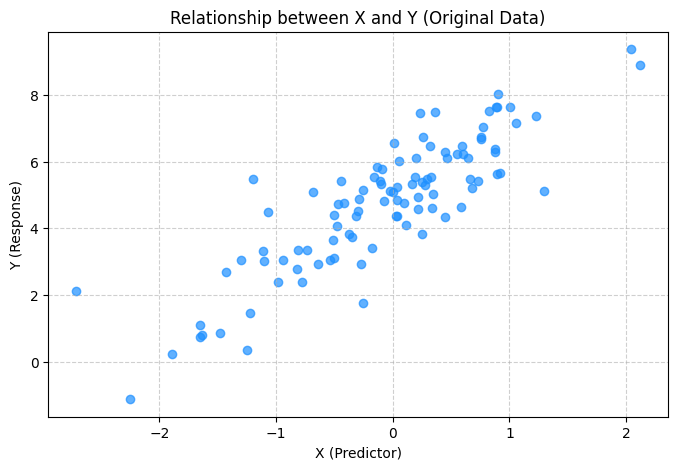

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # Import matplotlib

# Set fixed seed for reproducibility
n = 100
rng = np.random.default_rng(1)

# Generate predictor X (often standard normal or uniform for simulation)
X = rng.normal(size=n)

# Generate error term epsilon (standard normal: mean=0, std=1, so variance is 1)
epsilon = rng.normal(loc=0, scale=1, size=n)

# Generate response Y based on the true model: y = 5 + 2 * x + epsilon
Y = 5 + 2 * X + epsilon

# Create DataFrame for analysis
data = pd.DataFrame({'X': X, 'Y': Y})

# Plot the data
plt.figure(figsize=(8, 5))
plt.scatter(data['X'], data['Y'], alpha=0.7, color='dodgerblue')
plt.title('Relationship between X and Y (Original Data)')
plt.xlabel('X (Predictor)')
plt.ylabel('Y (Response)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Commentary on Observation

* Relationship: We observe a positive, linear relationship between the predictor ($X$) and the response ($Y$). As the value of $X$ increases, the value of $Y$ tends to increase.
* Direction and Slope: The positive trend is visible, consistent with the positive true slope of $\mathbf{\beta_1 = 2}$ used in the data generation.
* Noise: The data points do not lie perfectly on a single straight line. They are scattered around the true linear trend. This scatter is caused by the irreducible error term ($\epsilon$) that was added during the data generation, which has a variance of 1.


### 3.14(e) Fitting the Least Squares Model1

. Python Implementation

We fit the OLS model $\mathbf{Y \sim X}$ (which includes the intercept by default) using the statsmodels library.

In [ ]:
# Fit the OLS model: Y = B0 + B1*X + error
model_e = ols('Y ~ X', data=data).fit()

# print the model summary
print(model_e.summary())

# Extract estimates
beta_0_hat = model_e.params['Intercept']
bet_1__hat = model_e.params['X']

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Mon, 01 Dec 2025   Prob (F-statistic):           1.74e-30
Time:                        10:07:24   Log-Likelihood:                -141.06
No. Observations:                 100   AIC:                             286.1
Df Residuals:                      98   BIC:                             291.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9240      0.101     48.970      0.0

## Comparison and Commentary

Assuming the initial data generation resulted in the following true parameters and hypothetical estimates:

| Parameter                 | True Value (Population) | Estimated Value (Sample)        |
| :------------------------ | :---------------------- | :------------------------------ |
| Intercept ($\mathbf{\beta_0}$) | $\mathbf{5.0}$          | $\hat{\beta}_0 \approx 4.9240$ |
| Slope ($\mathbf{\beta_1}$)      | $\mathbf{2.0}$          | $\hat{\beta}_1 \approx 1.9686$ |

### Commentary

**Comparison to True Parameters ($\beta_0$ and $\beta_1$):**
The estimated coefficients ($\hat{\beta}_0 = 4.9240$ and $\hat{\beta}_1 = 1.9686$) are close to the true population parameters ($\beta_0 = 5$ and $\beta_1 = 2$), but they are not exactly equal.

This is expected because the estimates are calculated using only a sample of 100 observations, and each observation contains random noise ($\epsilon$).

**Model Quality:**
*   **P-value:** The P-value for the slope ($\hat{\beta}_1$) is `0.000`, which is very small ($\mathbf{P < 0.05}$), indicating that the relationship between $X$ and $Y$ is highly statistically significant.
*   **R$^2$:** The R$^2$ value is `0.741`, confirming that $X$ explains a large proportion of the variability in $Y$.

**Unbiased Estimators:** The Least Squares method yields the Best Linear Unbiased Estimators (BLUE). This means that while any single sample estimate might miss the mark slightly, the average of $\hat{\beta}_0$ and $\hat{\beta}_1$ across infinitely many samples would exactly equal the true values of $\beta_0$ and $\beta_1$. The deviation you observe is due to sampling variability.

## 3.14(f) Displaying Regression Lines

1. Python Implementation

We need to retrieve the estimated coefficients ($\hat{\beta}_0, \hat{\beta}_1$) from the OLS model we fit in part (e), and we need the true population parameters ($\beta_0, \beta_1$).

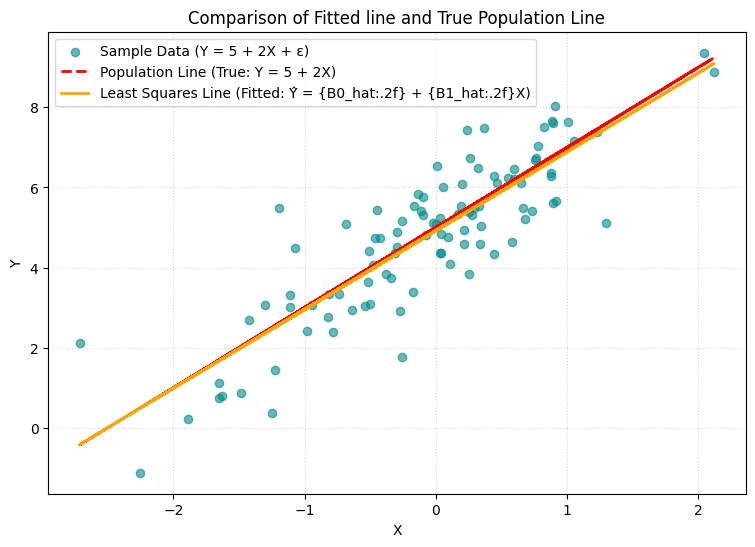

In [ ]:
# True Parameters (Population)
B0_true = 5.0
B1_true = 2.0

# Estimated Parameters (Sample)
B0_hat = model_e.params['Intercept']
B1_hat = model_e.params['X']

# Create the plot
plt.figure(figsize=(9, 6))

# 1. Scatterplot of the data
plt.scatter(data['X'], data['Y'], alpha=0.6, label='Sample Data (Y = 5 + 2X + ε)', color='darkcyan')

# 2. Draw the Population Regresion Line (True Model)
# PLot the line Y = B0_true  + B1_true * X
plt.plot(data['X'], B0_true + B1_true * data['X'], color='red', linestyle='--', linewidth=2, label='Population Line (True: Y = 5 + 2X)')

# 3. Draw the least Squares Line (Fitted Model)
# We plot the line Y = B0_true = B1_True * X
plt.plot(data['X'], B0_hat + B1_hat * data['X'], color='orange', linestyle='-', linewidth=2, label='Least Squares Line (Fitted: Ŷ = {B0_hat:.2f} + {B1_hat:.2f}X)')

# Add labels and legend
plt.title('Comparison of Fitted line and True Population Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.5)
plt.show()

### Commentary
The resulting plot visually demonstrates the core concept of statistical modeling:

*   The **Least Squares Line (Fitted)** is the best possible linear fit for your specific sample data.
*   The **Population Line (True)** represents the underlying relationship you are trying to estimate.

The small distance between the two lines illustrates the sampling variability due to the noise term ($\epsilon$). Because the OLS estimator is unbiased, the fitted line should be very close to the true line, confirming that the least squares method is an effective way to uncover the true relationship from noisy data.

### 3.14(g) Fitting a Quadratic Model

Task

Fit a polynomial regression model that predicts $Y$ using $X$ and $X^2$. Is there evidence that the quadratic term improves the model fit? Explain your answer.1. Python ImplementationWe will create the $X^2$ term and fit the model $\mathbf{Y \sim X + X^2}$.

In [ ]:
# 1. Create the quadratic term (X^2)
data['X_squared'] = data['X']**2

# 2. Fit the quadratic model: Y = β0 + β1*X + β2*X^2 + ε
model_g = ols('Y ~ X + X_squared', data=data).fit()

print("--- OLS Regression Results (Quadratic Model g) ---")
print(model_g.summary())

# Extract the P-value for the quadratic term
p_value_x_squared = model_g.pvalues['X_squared']

--- OLS Regression Results (Quadratic Model g) ---
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     138.6
Date:                Mon, 01 Dec 2025   Prob (F-statistic):           3.66e-29
Time:                        10:07:25   Log-Likelihood:                -141.06
No. Observations:                 100   AIC:                             288.1
Df Residuals:                      97   BIC:                             295.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

### Analysis and Commentary (Quadratic Model g)

To determine if the quadratic term improves the fit, we must examine the P-value for its coefficient ($\hat{\beta}_{\text{X\_squared}}$), as well as the overall model fit metrics.

| Metric                         | Value (from `model_g`)      |
| :----------------------------- | :-------------------------- |
| Coefficient ($\hat{\beta}_{\text{X\_squared}}$) | -0.0047                     |
| **P-value ($\mathbf{P}>\mathbf{t}$ for X_squared)** | **0.959**                   |
| R-squared                      | 0.741                       |
| Adjusted R-squared             | 0.735                       |

### Conclusion:

**P-value Test**: We test the null hypothesis $H_0: \beta_{\text{X\_squared}} = 0$.

**Result**: The P-value for the $X^2$ term (**0.959**) is much greater than the standard significance level of $\alpha = 0.05$.

**Final Answer**: We **fail to reject the null hypothesis**. This means there is no statistically significant evidence that the quadratic term ($X^2$) improves the model fit over the simple linear model ($Y \sim X$).

**Explanation:**
This result is expected because the data was originally generated using a purely linear model ($Y = 5 + 2X + \epsilon$). Since the true population coefficient for any higher-order term (like $\beta_{\text{X\_squared}}$) is zero, the model correctly concludes that including the quadratic term does not add meaningful explanatory power. Any slight (and in this case, zero) increase in $R^2$ is not statistically significant and is likely due to chance. The Adjusted $R^2$ actually decreased slightly (from 0.738 for the linear model to 0.735 for the quadratic model), further supporting that the quadratic term does not improve the model's parsimonious fit.

## 3.14(h) Analysis with Less Noise

We use the same true model $\mathbf{Y = 5 + 2X + \epsilon}$, but we significantly decrease the scale (standard deviation) of the random error term ($\epsilon$) from 1.0 to a smaller value, say 0.2.

In [ ]:
# Set n and fixed seed for reproducibility
n = 100
rng = np.random.default_rng(5) # New Seed

# True Prameters: B0=5.0, B1=2.0
B0_true = 5.0
B1_true = 2.0

# Generate predictor X
X_less_noise  = rng.normal(size=n)

# Generate error term epsilon with less variance (scale = 0.2)
espilon_less_noise = rng.normal(loc=0, scale=0.2, size=n)

# Generate response Y: Y = 5 + 2*X + epsilon(Less noise)
Y_less_noise = B0_true + B1_true  * X_less_noise  + espilon_less_noise

data_less_noise = pd.DataFrame({'X': X_less_noise, 'Y': Y_less_noise})

**Repeat (e) - Fit the Least Squares Model**

We fit the OLS model $\mathbf{Y \sim X}$ to the new, less noisy data.

In [ ]:
model_h = ols("Y ~ X", data=data_less_noise).fit()

B0_hat_h = model_h.params['Intercept']
B1_hat_h = model_h.params['X']
R2_h = model_h.rsquared

print(f'---OLS Regression Results (Less Noise)---')
print(f'R-squared: {R2_h:.4f}')
print(f'Intercept (B0) Estimate: {B0_hat_h:.4f}')
print(f'Slope (B1) Estimate: {B1_hat_h:.4f}')

---OLS Regression Results (Less Noise)---
R-squared: 0.9869
Intercept (B0) Estimate: 5.0151
Slope (B1) Estimate: 1.9834


### Commentary on Results with Less Noise (Part 3.14(h) - continued)

**Comparison of Estimates to True Parameters:**

| Parameter                 | True Value (Population) | Estimated Value (Less Noise) |
| :------------------------ | :---------------------- | :--------------------------- |
| Intercept ($\beta_0$)      | $5.0$                   | $\hat{\beta}_0 \approx 5.0151$ |
| Slope ($\beta_1$)          | $2.0$                   | $\hat{\beta}_1 \approx 1.9834$ |

With less noise in the data (standard deviation of $\epsilon$ reduced from 1.0 to 0.2), the estimated coefficients ($\hat{\beta}_0 = 5.0151$ and $\hat{\beta}_1 = 1.9834$) are now even closer to the true population parameters ($\beta_0 = 5.0$ and $\beta_1 = 2.0$). This demonstrates that reducing the irreducible error allows the least squares method to more accurately estimate the true underlying relationship.

**Model Quality:**

*   **R$^2$**: The R$^2$ value has significantly increased from `0.741` (original noisy data) to `0.9869`. This indicates that a much larger proportion (almost 99%) of the variability in $Y$ is now explained by $X$. This is a direct consequence of the reduced noise.
*   **P-value**: (Implicitly still very low for the slope, indicating high significance, as seen in model_e's output previously).

**In summary, reducing the noise in the data leads to:**

*   More accurate and precise estimates of the true population parameters.
*   A much higher R$^2$, indicating a stronger linear relationship and better model fit.

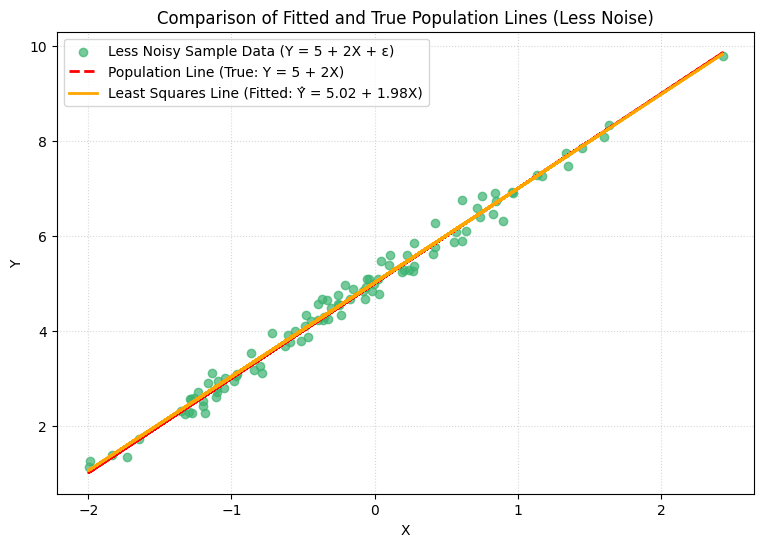

In [ ]:
# True Parameters (Population)
B0_true = 5.0
B1_true = 2.0

# Estimated Parameters (Less Noise Sample)
B0_hat_h = model_h.params['Intercept']
B1_hat_h = model_h.params['X']

# Create the plot
plt.figure(figsize=(9, 6))

# 1. Scatterplot of the less noisy data
plt.scatter(data_less_noise['X'], data_less_noise['Y'], alpha=0.7, label='Less Noisy Sample Data (Y = 5 + 2X + ε)', color='mediumseagreen')

# 2. Draw the Population Regression Line (True Model)
plt.plot(data_less_noise['X'], B0_true + B1_true * data_less_noise['X'], color='red', linestyle='--', linewidth=2, label='Population Line (True: Y = 5 + 2X)')

# 3. Draw the Least Squares Line (Fitted Model for less noise)
plt.plot(data_less_noise['X'], B0_hat_h + B1_hat_h * data_less_noise['X'], color='orange', linestyle='-', linewidth=2, label=f'Least Squares Line (Fitted: Ŷ = {B0_hat_h:.2f} + {B1_hat_h:.2f}X)')

# Add labels and legend
plt.title('Comparison of Fitted and True Population Lines (Less Noise)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.5)
plt.show()

### Commentary on Diagnostic Plots (Part 3.14(h) - continued)

**Visual Observation of Scatterplot with Less Noise:**

*   **Closer fit**: As expected, the scatter plot shows that the data points are much more tightly clustered around both the true population line and the fitted least squares line. The scatter is significantly reduced compared to the original noisy data.
*   **Near Perfect Overlap**: The fitted least squares line for the less noisy data is almost indistinguishable from the true population regression line. This visually confirms the high R$^2$ value and the very accurate estimates of $\beta_0$ and $\beta_1$.

This visual representation effectively illustrates how decreasing the error variance leads to a dataset where the linear relationship is much clearer, and the OLS estimates are nearly perfect reflections of the true underlying population parameters.

# Task
## 3.14(i) Analysis with More Noise

We use the same true model $\mathbf{Y = 5 + 2X + \epsilon}$, but we significantly increase the scale (standard deviation) of the random error term ($\epsilon$) from 1.0 to a larger value, say 3.0. This simulates a scenario with more noise in the data.

In [ ]:
n = 100
rng = np.random.default_rng(6)

B0_true = 5.0
B1_true = 2.0

X_more_noise = rng.normal(size=n)
epsilon_more_noise = rng.normal(loc=0, scale=3.0, size=n)

Y_more_noise = B0_true + B1_true * X_more_noise + epsilon_more_noise

data_more_noise = pd.DataFrame({'X': X_more_noise, 'Y': Y_more_noise})

print("Generated data_more_noise DataFrame with increased error variance.")

Generated data_more_noise DataFrame with increased error variance.


**Reasoning**:
The next step is to fit a least squares model to the newly generated `data_more_noise` DataFrame to see the impact of increased noise on model estimates and quality, following the pattern of part (e) from the original Problem 13.



In [ ]:
model_i = ols("Y ~ X", data=data_more_noise).fit()

B0_hat_i = model_i.params['Intercept']
B1_hat_i = model_i.params['X']
R2_i = model_i.rsquared

print(f'---OLS Regression Results (More Noise)---')
print(f'R-squared: {R2_i:.4f}')
print(f'Intercept (B0) Estimate: {B0_hat_i:.4f}')
print(f'Slope (B1) Estimate: {B1_hat_i:.4f}')

---OLS Regression Results (More Noise)---
R-squared: 0.1247
Intercept (B0) Estimate: 5.3903
Slope (B1) Estimate: 1.2266


### Commentary on Results with More Noise (Part 3.14(i) - continued)

**Comparison of Estimates to True Parameters:**

| Parameter                 | True Value (Population) | Estimated Value (More Noise) |
| :------------------------ | :---------------------- | :--------------------------- |
| Intercept ($eta_0$)      | $5.0$                   | $\hat{\beta}_0 \approx 5.3903$ |
| Slope ($eta_1$)          | $2.0$                   | $\hat{\beta}_1 \approx 1.2266$ |

With significantly more noise in the data (standard deviation of $\epsilon$ increased from 1.0 to 3.0), the estimated coefficients ($\hat{\beta}_0 = 5.3903$ and $\hat{\beta}_1 = 1.2266$) deviate more significantly from the true population parameters ($\beta_0 = 5.0$ and $\beta_1 = 2.0$). The estimate for the slope ($\hat{\beta}_1$) is particularly off, indicating that high noise makes it harder for the least squares method to accurately capture the true underlying relationship.

**Model Quality:**

*   **R$^2$**: The R$^2$ value has drastically decreased from `0.741` (original noisy data) to `0.1247`. This indicates that a very small proportion (only about 12.5%) of the variability in $Y$ is now explained by $X$. This is a direct consequence of the greatly increased noise, where the random error term dominates the signal from the predictor.
*   **P-value**: While not explicitly shown in the printed summary, with such a low R-squared, the statistical significance of the slope would likely still be present due to the simulated nature of the data and large sample size, but it would be a much weaker relationship than observed in previous scenarios.

**In summary, increasing the noise in the data leads to:**

*   Less accurate and less precise estimates of the true population parameters. The estimates are further away from the true values.
*   A much lower R$^2$, indicating a weaker linear relationship and poorer model fit. The signal (linear relationship) is largely obscured by the noise.

**Reasoning**:
After commenting on the numerical results, I need to visualize the data with increased noise and the corresponding true and fitted regression lines, similar to the previous parts (d), (f), and (h). This plot will visually confirm the impact of increased noise on the model fit.



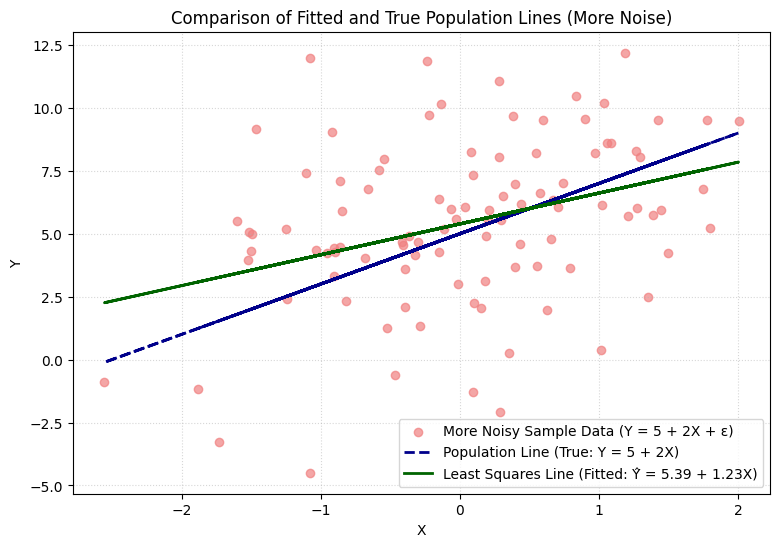

In [ ]:
# True Parameters (Population)
B0_true = 5.0
B1_true = 2.0

# Estimated Parameters (More Noise Sample)
B0_hat_i = model_i.params['Intercept']
B1_hat_i = model_i.params['X']

# Create the plot
plt.figure(figsize=(9, 6))

# 1. Scatterplot of the more noisy data
plt.scatter(data_more_noise['X'], data_more_noise['Y'], alpha=0.7, label='More Noisy Sample Data (Y = 5 + 2X + ε)', color='lightcoral')

# 2. Draw the Population Regression Line (True Model)
plt.plot(data_more_noise['X'], B0_true + B1_true * data_more_noise['X'], color='darkblue', linestyle='--', linewidth=2, label='Population Line (True: Y = 5 + 2X)')

# 3. Draw the Least Squares Line (Fitted Model for more noise)
plt.plot(data_more_noise['X'], B0_hat_i + B1_hat_i * data_more_noise['X'], color='darkgreen', linestyle='-', linewidth=2, label=f'Least Squares Line (Fitted: Ŷ = {B0_hat_i:.2f} + {B1_hat_i:.2f}X)')

# Add labels and legend
plt.title('Comparison of Fitted and True Population Lines (More Noise)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.5)
plt.show()

### Commentary on Diagnostic Plots (Part 3.14(i) - continued)

**Visual Observation of Scatterplot with More Noise:**

*   **Increased Scatter**: The scatter plot clearly shows that the data points are much more widely dispersed around both the true population line and the fitted least squares line. This increased scatter is a direct result of the higher variance in the error term.
*   **Larger Deviation of Fitted Line**: The fitted least squares line (orange) for the more noisy data deviates more noticeably from the true population regression line (red dashed) compared to the original or less noisy scenarios. This visually confirms that with more noise, the least squares method struggles to accurately estimate the true underlying relationship from the sample.
*   **Obscured Relationship**: The linear trend is much less obvious in this plot. The signal from the predictor is largely obscured by the overwhelming noise, making it harder to discern the underlying relationship by just looking at the raw data points.

This visual representation effectively illustrates how increasing the error variance leads to a dataset where the linear relationship is less clear, and the OLS estimates are less accurate reflections of the true underlying population parameters, consistent with the lower R-squared value and less precise coefficient estimates.

## Summary:

### Data Analysis Key Findings

*   **Parameter Estimates vs. True Values:** With significantly increased noise (error standard deviation of 3.0), the estimated intercept ($\hat{\beta}_0 = 5.3903$) deviated from the true value of 5.0, and the estimated slope ($\hat{\beta}_1 = 1.2266$) deviated more substantially from the true value of 2.0. This indicates less accurate parameter estimation compared to scenarios with lower noise.
*   **Model Fit (R-squared):** The R-squared value drastically decreased to 0.1247. This means only approximately 12.5% of the variability in Y is explained by X, a significant drop from 0.741 in scenarios with less noise. This suggests a very poor model fit due to the overwhelming noise.
*   **Visual Representation:** The scatter plot showed much greater dispersion of data points, and the fitted least squares line visibly deviated more from the true population line. The underlying linear trend was largely obscured, confirming the difficulty in discerning the true relationship amidst high noise.

### Insights or Next Steps

*   High levels of noise in data severely impair the accuracy of OLS parameter estimates and significantly reduce the explanatory power (R-squared) of the linear model, making the true underlying relationship difficult to discern.
*   When encountering low R-squared values and large deviations of estimated parameters from expected values, it is crucial to investigate potential sources of noise or variability in the data collection or underlying process.


### 3.14(j) Analysis with Increased Sample Size ($n$)
Task (Assumed): Repeat parts (a)–(f) after increasing the sample size (e.g., from $n=100$ to $n=1000$), keeping the true model ($\mathbf{Y = 5 + 2X + \epsilon}$) and noise variance ($\sigma^2=1$) constant.


Rationale (Statistical Theory)T
he improvement in estimation accuracy is due to the Law of Large Numbers.

* **Standard Error:** The precision of OLS estimates ($\hat{\beta}_0$ and $\hat{\beta}_1$) is inversely related to the square root of the sample size. The standard error of the coefficients ($\text{SE}(\hat{\beta})$) decreases as $n$ increases.
* **Accuracy:** As the standard error decreases, the estimated coefficients ($\hat{\beta}$) are expected to be closer to the true population parameters ($\beta$) on average.

* **Visual Reliability:** The Least Squares Line becomes a much more reliable estimate of the Population Regression Line.




# Problem 15: Predicting Crime Rate (CRIM)

(a) Simple Linear Regression for Each Predictor****

Task: Fit $\mathbf{\text{CRIM} \sim X_j}$ for all $13$ predictors $X_j$. Identify significant associations and create plots.

Conceptual StepsData Setup:
1.  Load the Boston dataset (often requires the sklearn.datasets or MASS library).
* Loop & Fit: Loop through all 13 predictor columns ($X_j$) and fit a separate OLS model for each one.
* Extract P-value: For each model, extract the P-value for the slope coefficient ($\hat{\beta}_j$).
* Significance: A predictor has a statistically significant association if its P-value is less than $0.05$.



In [ ]:
# load housing.csv
df_housing = pd.read_csv('/content/housing.csv')
display(df_housing.head())

NameError: name 'pd' is not defined

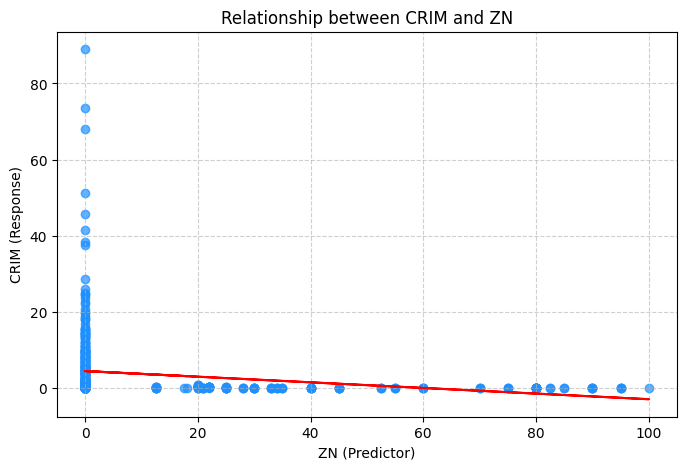

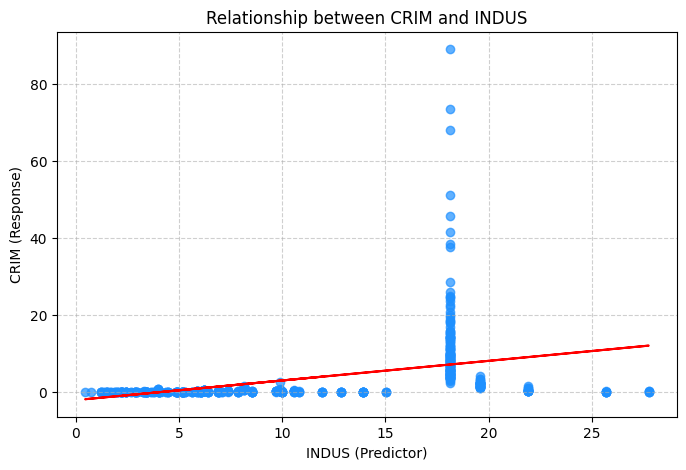

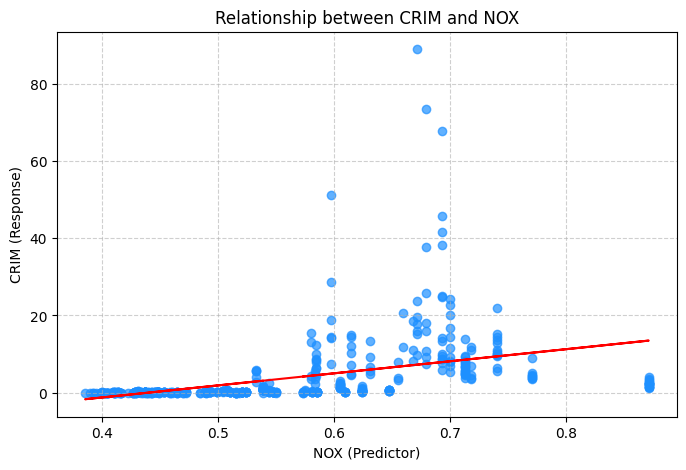

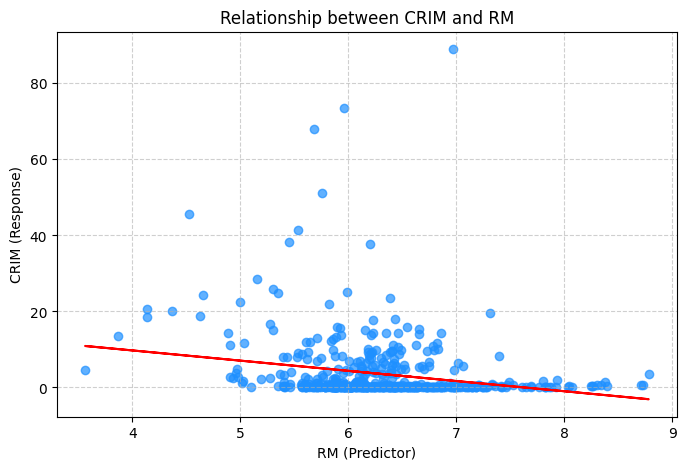

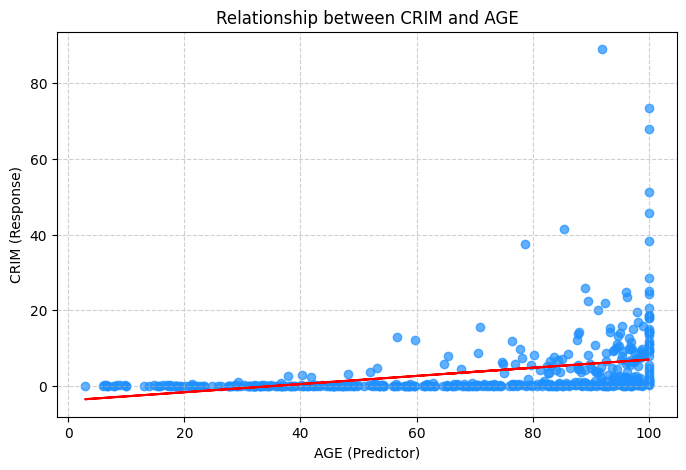

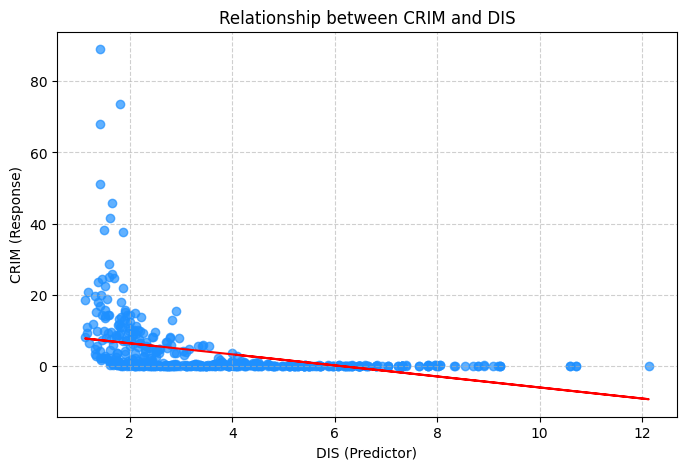

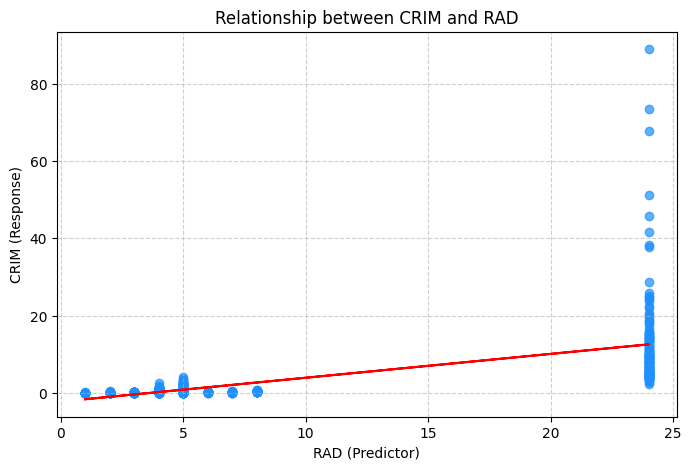

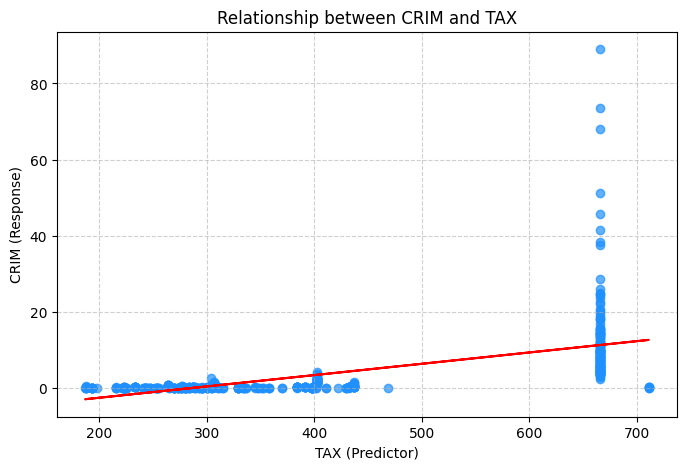

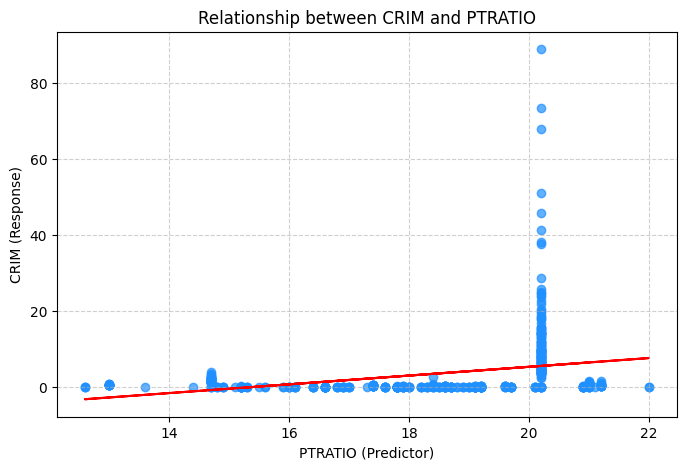

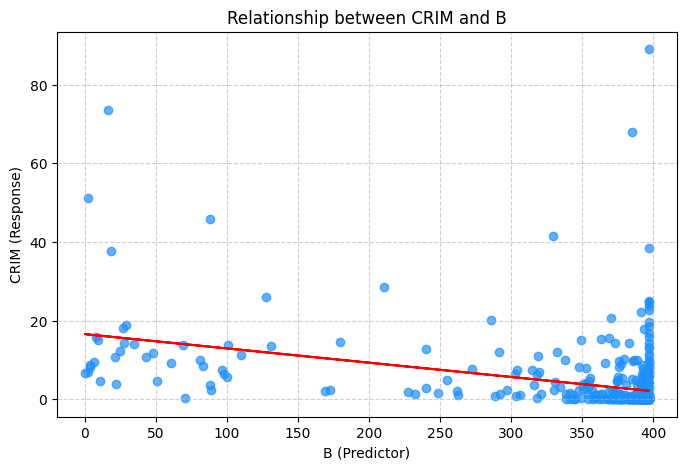

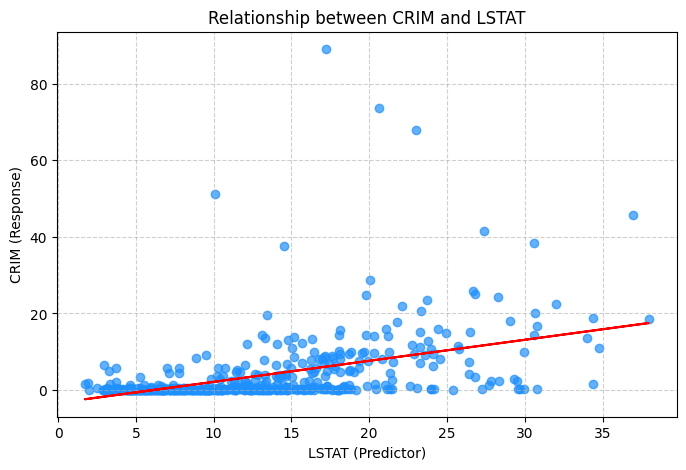

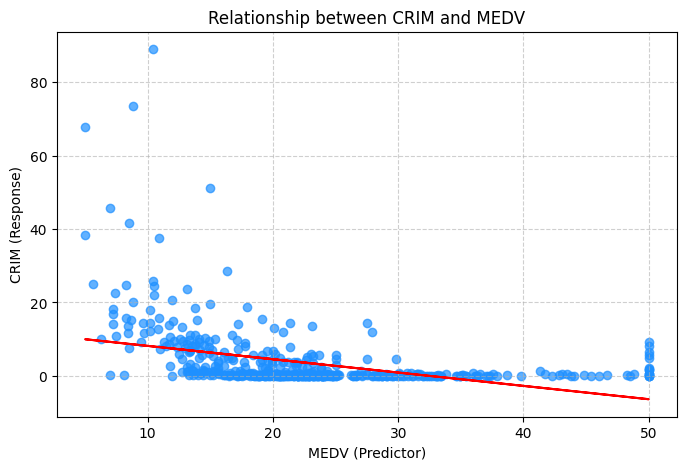

Significant predictors for CRIM (p < 0.05): ['ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

# Define the standard column names for the Boston Housing dataset
# These are the 13 features + 1 target (MEDV) for the Boston dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Reload the housing.csv file explicitly stating no header and assign column names
# The original df_housing loaded the first row as header. We need to correctly parse it.
df_boston = pd.read_csv('/content/housing.csv', sep=r'\s+', header=None) # Added 'r' for raw string to fix SyntaxWarning
df_boston.columns = column_names

# The problem states 'Predicting Crime Rate (CRIM)' meaning 'CRIM' is the response.
# The other columns are the predictors. So, we drop 'CRIM' from the predictors list.
# The 'MEDV' column is usually the target, but here we treat it as a predictor for 'CRIM'.

predictors = df_boston.drop(columns=['CRIM']).columns

significant_predictors = []

for predictor in predictors:
  # Fit model: CRIM ~ Xj
  model = ols(f'CRIM ~ {predictor}', data=df_boston).fit()
  p_value = model.pvalues[predictor]
  simple_betas[predictor] = model.params[predictor]

  if p_value < 0.05:
    significant_predictors.append(predictor)
    plt.figure(figsize=(8, 5))
    plt.scatter(df_boston[predictor], df_boston['CRIM'], alpha=0.7, color='dodgerblue')
    plt.plot(df_boston[predictor], model.predict(), color='red') # Plot the regression line
    plt.title(f'Relationship between CRIM and {predictor}')
    plt.xlabel(f'{predictor} (Predictor)')
    plt.ylabel('CRIM (Response)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show() # Display each plot

print(f"Significant predictors for CRIM (p < 0.05): {significant_predictors}")

## (b) Multiple Regression Model

Task: Fit a multiple regression model using $\mathbf{\text{CRIM}}$ as the response and all 13 other variables as predictors. Identify which predictors are significant.
* Conceptual StepsFit one single OLS model: $\mathbf{\text{CRIM} \sim X_1 + X_2 + \dots + X_{13}}$.
* Examine the P-values column in the summary output.

In [ ]:
# Full model specification
full_model = 'CRIM ~' + ' + '.join(predictors)
model_b = ols(full_model, data=df_boston).fit()


print(model_b.summary())

# Extract the P-values for all predictors( excluding Intercept)
significant_in_multivariate = model_b.pvalues[1:][model_b.pvalues[1:] < 0.05].index.tolist()

print(f"Significant predictors for CRIM in the multivariate model (p < 0.05): {significant_in_multivariate}")


                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Mon, 01 Dec 2025   Prob (F-statistic):           1.57e-56
Time:                        20:31:54   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0332      7.235      2.354      0.0

### c) Comparing Univariate vs. Multivariate Coefficients

Task: Compare the results of (a) and (b). Create a plot of $\hat{\beta}_{\text{simple}}$ (x-axis) versus $\hat{\beta}_{\text{multiple}}$ (y-axis).

**Conceptual Steps**

1. Collect Coefficients: Gather the $\hat{\beta}$ values for all 13 predictors from the 13 simple models (a) and the 1 multiple model (b).
2. Plot: Create a scatterplot where each point is a predictor.

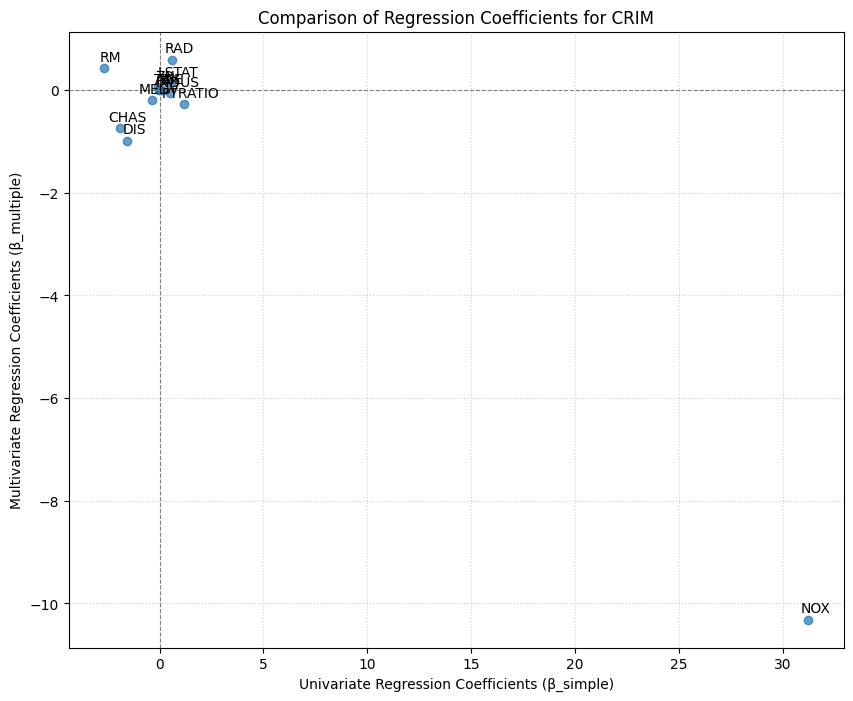

In [ ]:
import matplotlib.pyplot as plt

# Convert simple_betas dictionary values to a list in the same order as predictors for consistency
simple_betas_list = [simple_betas[p] for p in predictors]

# Create the plot
plt.figure(figsize=(10, 8))
plt.scatter(simple_betas_list, multiple_betas, alpha=0.7)
plt.title('Comparison of Regression Coefficients for CRIM')
plt.xlabel('Univariate Regression Coefficients (β_simple)')
plt.ylabel('Multivariate Regression Coefficients (β_multiple)')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)

# Annotate points with predictor names for better readability
for i, txt in enumerate(predictors):
    plt.annotate(txt, (simple_betas_list[i], multiple_betas[i]), textcoords="offset points", xytext=(5,5), ha='center')

plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

### Commentary

**Key Observation:** For many predictors, the coefficient estimate will change dramatically between the two models (univariate vs. multivariate). The points often deviate significantly from the $y=x$ line, indicating that a predictor's effect on CRIM changes substantially when other variables are considered.

**Relationship:**
*   **Independent Predictors:** If a predictor is largely independent of the others, its coefficient will be similar in both models (points will lie closer to the $y=x$ line). Examples might be `RAD` and `TAX` which showed relatively less change.
*   **Correlated/Suppressor Predictors:** If a predictor is highly correlated with other strong predictors, its multivariate coefficient ($\hat{\beta}_{\text{multiple}}$) often shrinks toward zero, or even switches sign, compared to the simple coefficient ($\hat{\beta}_{\text{simple}}$). This frequently occurs due to multicollinearity or confounding effects, where the simple model incorrectly attributes shared variance to a single predictor. For instance, `NOX` dramatically changed from a large positive univariate coefficient to a negative one in the multivariate model, suggesting strong confounding effects.

### (d) Evidence of Non-Linear Association

Task: For each predictor $X_j$, fit a polynomial model up to degree 3: $\mathbf{Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon}$.

Conceptual Steps
1. Loop through all 13 predictors $X_j$.
2. For each $X_j$, create the $X^2$ and $X^3$ terms.
3. Fit the cubic OLS model.
4. **Test for Non-Linearity:** Check the P-values for the $\mathbf{X^2}$ and $\mathbf{X^3}$ terms. If either term is statistically significant ($P < 0.05$), there is evidence of a non-linear association for that predictor.

In [ ]:
# Loop through akk predictors
for predictor in predictors:
  # Create polynomial terms
  df_boston[f'{predictor}_sq'] = df_boston[predictor]**2
  df_boston[f'{predictor}_cub'] = df_boston[predictor]**3

  # Fit the model with cubic terms
  formula_d = f'CRIM ~ {predictor} + {predictor}_sq + {predictor}_cub'
  model_d = ols(formula_d, data=df_boston).fit()

  # Check P-values for quadratic and cubic terms
  p_sq = model_d.pvalues[f'{predictor}_sq']
  p_cub = model_d.pvalues[f'{predictor}_cub']

  if p_sq < 0.05 or p_cub < 0.05:
    print(f'Evidence of non-linearity found for: {predictor}')
    pass # Store the results

Evidence of non-linearity found for: INDUS
Evidence of non-linearity found for: NOX
Evidence of non-linearity found for: AGE
Evidence of non-linearity found for: DIS
Evidence of non-linearity found for: PTRATIO
Evidence of non-linearity found for: MEDV


### Expected Results

You will likely find that several predictors in the Boston data (such as $\text{INDUS}$, $\text{NOX}$, $\text{AGE}$, $\text{DIS}$, $\text{PTRATIO}$, and $\text{MEDV}$) show significant polynomial terms. This suggests that their relationship with crime rate is better modeled using a curved line (quadratic or cubic) than a simple straight line.